# **Bournemouth University Building Classification and Detection - Campus PathFinder**

##Introduction

Bournemouth University’s Talbot Campus consists of a variety of buildings, spread out across different locations, that are not easy to identify. This creates a challenge for new visitors like staff and students. Current static representations, like the image below, provide rough visual and positional descriptors of buildings but are unable to do this relative to the position of the navigator.

![picture](https://drive.google.com/uc?id=1mb0ZHSb5pYT0V0qPnw39ntZgfqDQHuIF)
<center>A static image of showing the campus overview</center>

This is owing to the phenomenon of Cognitive mapping (Manser 12 2018). Cognitive mapping denotes how people can acquire, code, store and recall information about their immediate environment. Notable landmarks like buildings, often serve as navigation beacons, further improving the process by which Cognitive mapping models  are created (Chan et al. 2012).

The Campus Pathfinder project aims to solve this problem by developing a computer vision model that allows navigators to recognise buildings relative to their original position. This model would assist navigators in developing Cognitive maps by improving the speed through which they acquire spatial information. This project is fairly novel as no existing models for recognising buildings on Bournemouth University’s Talbot campus are publicly available.

This project effectively lays the foundation for a future solution. Specifically, a Wayfinder that allows navigators to use their smartphones to capture images of local buildings and together with GPS information, returns cues to provide intuitive navigation for the user.


##Project's Aims

This project aims to develop a model that can detect and recognise key buildings on Bournemouth University’s Talbot Campus with an acceptable level of error. We define key buildings to include Poole House, The Sir Michael Cobham Library, Kimmeridge House, Dorset House, Weymouth House, The Fusion Building, and Christchurch House. The choice for these 8 buildings were driven by a requirement to limit the scope of the project. They were also selected because they were expected to be some of the most frequented by people navigating on campus.


##Project's Objectives

To achieve the project’s aim, the team defined the following objectives:
1. Gather and annotate 32 Morning and Night pictures of each of the 8 buildings selected. The Annotation will be done using VGG Image Annotator.

2. Perform building classification and detection using PyTorch using a two-stepped approach. First by using a trained ResNet-based Neural network to perform image classification and detection. And then comparing this detection model with another object detection algorithm, YOLOv5. Error analysis will be performed on both models to understand the reasons for their error rates and predictions.
3. Perform an in-note book demonstration of each model's ability to detect and classify the buildings on campus.


##Data Acquisition



To reduce the potential for bias present in a skewed dataset, it was deemed necessary to ensure that each of the 8 buildings were equally sampled in our dataset. To do this, we captured 32 images of each building; with 16 taken during the daytime and 16 at night. This led to there being a total of 256 (32 x 8) images in our initial dataset. The images of all buildings were captured using smartphones.

![picture](https://drive.google.com/uc?id=10lqZ1-Z8_qtKaS3INMBCBWepGXcwbK6G)
<center>A collage showing all images gathered</center>

Where needed certain images featured occlusions. At the time of data collection, we considered it important to include these occlusions as we believed it may make our model more robust to occlusions. This hypothesis will be evaluated later in this paper.

![Image of Sir Michael Cobham Library featuring Occlusions](https://drive.google.com/uc?id=1dmtu0wm57zaBUzh-Pjv136r-XBeXbpI0)<center>Image of Sir Michael Cobham Library featuring Occlusions</center>

##Data Annotation

Upon data collection, the team performed annotation using the VGG Image Annotator. The team had originally performed annotation on all occlusions and the main subject (the buildings). The team however decided to scale this back owing to concerns over the increased number of annotated occlusions potentially increasing the complexity of the project.

![picture](https://drive.google.com/uc?id=1JXx6_V16f1mDFlhHvk0QIQtdRBM1vlwV)

<center>Initial Annotation Approach showing how we initially tried to annotate all occlusions. Image here is of Poole House</center>


![picture](https://drive.google.com/uc?id=1b_UBGGpwTdO9hmepiFvGtbjtiuYqjy8o)

<center>Final Annotation Approach, focusing on only the subject. Image here is of Poole House </center>

# **Importing Libraries & Datasets**

### Installing Dependencies

This installs the requirements to run YOLOv5 on your local machine. Running this code block would only be necessary if you want to retrain a new YOLO model as it creates another "yolov5" folder in the runtime files. Otherwise, you can simply skip and run the **"Trained YOLOv5 Model"** section.

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
!cd yolov5
!pip install -r /content/yolov5/requirements.txt  # install

fatal: destination path 'yolov5' already exists and is not an empty directory.
ERROR: Operation cancelled by user


This package when installed enables dataset uploads directly from a RoboFlow Workspace. The dataset has been saved for convinence in the **"Trained YOLOv5 Models block"** in subsequent code blocks below.

In [ ]:
!pip install roboflow

  Using cached roboflow-1.1.28-py3-none-any.whl (74 kB)
  Using cached certifi-2023.7.22-py3-none-any.whl (158 kB)
  Using cached chardet-4.0.0-py2.py3-none-any.whl (178 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached idna-2.10-py2.py3-none-any.whl (58 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.12.1
  Attempting uninstall: chardet
  

This packages installs the requirements for running the Efficient Net model from PyTorch

In [ ]:
!pip install efficientnet_pytorch

  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached 

### Importing Libraries

This imports all the essential libraries used in this notebook. The import for EfficientNet and RoboFlow were commented out of the code under the assumption that the dependencies weren't previously installed. Please kindly uncomment the code if the entire notebook wants to be run from top to bottom

In [ ]:
#Main Libraries
import time
import os
import uuid   # Unique identifier
import time
import torch
import numpy as np
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib
import json
import random
import warnings
import re
import tqdm


#File Libraries
from PIL import Image
from tempfile import TemporaryDirectory
from pathlib import Path
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split


# Pytorch Libraries
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import torch.nn.functional as F
from torchvision import datasets, models, transforms
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import Dataset, DataLoader

#Run only if RoboFlow and EfficientNet Packages are reinstalled
#from efficientnet_pytorch import EfficientNet
#from roboflow import Roboflow

cudnn.benchmark = True
plt.ion()   # interactive mode

### Classification Dataset

This section downloads and unzips the dataset used for the classification task from a Google Drive. It is required to run the **"Building Classification using ResNet"** section.

In [ ]:
!gdown 1-TJw3CPgFwIBHfEDPo6DWTg2hY423DvL

Downloading...
From (original): https://drive.google.com/uc?id=1-TJw3CPgFwIBHfEDPo6DWTg2hY423DvL
From (redirected): https://drive.google.com/uc?id=1-TJw3CPgFwIBHfEDPo6DWTg2hY423DvL&confirm=t&uuid=7c7e49f3-cddc-44a8-9eef-d5fa83fdca36
To: /content/Building Classification.zip
100% 572M/572M [00:08<00:00, 70.7MB/s]


In [ ]:
!unzip 'Building Classification.zip'

Archive:  Building Classification.zip
   creating: Building Classification/test/
   creating: Building Classification/test/Christchurch House/
  inflating: Building Classification/test/Christchurch House/01.jpeg  
 extracting: Building Classification/test/Christchurch House/02.jpeg  
  inflating: Building Classification/test/Christchurch House/03.jpeg  
  inflating: Building Classification/test/Christchurch House/04.jpeg  
   creating: Building Classification/test/Dorset House/
  inflating: Building Classification/test/Dorset House/01.jpeg  
  inflating: Building Classification/test/Dorset House/02.jpeg  
  inflating: Building Classification/test/Dorset House/desktop.ini  
   creating: Building Classification/test/Fusion Building/
  inflating: Building Classification/test/Fusion Building/01.jpeg  
  inflating: Building Classification/test/Fusion Building/02.jpeg  
  inflating: Building Classification/test/Fusion Building/03.jpeg  
  inflating: Building Classification/test/Fusion Buildi

### Prediction Dataset

This section downloads and unzips the dataset used for bounding box prediction task from a Google Drive. It is required to run the **"Bounding Box Predicition using Baseline"** section.

In [ ]:
!gdown 1xOJL25TSxWQ56P-SPFTcX85u-O4uB78D -O "Raw_Images_And_Annotations.zip"

Downloading...
From (original): https://drive.google.com/uc?id=1xOJL25TSxWQ56P-SPFTcX85u-O4uB78D
From (redirected): https://drive.google.com/uc?id=1xOJL25TSxWQ56P-SPFTcX85u-O4uB78D&confirm=t&uuid=931ca27e-9200-4d89-acbd-d2196365d8a8
To: /content/Raw_Images_And_Annotations.zip
100% 572M/572M [00:04<00:00, 126MB/s]


In [ ]:
!unzip Raw_Images_And_Annotations.zip -d Raw_Images_And_Annotations

Archive:  Raw_Images_And_Annotations.zip
   creating: Raw_Images_And_Annotations/Christchurch/Annotation/
  inflating: Raw_Images_And_Annotations/Christchurch/Annotation/Christchurch.json  
   creating: Raw_Images_And_Annotations/Christchurch/Images/
  inflating: Raw_Images_And_Annotations/Christchurch/Images/Christchurch_Back_AM_01.jpeg  
  inflating: Raw_Images_And_Annotations/Christchurch/Images/Christchurch_Back_AM_02.jpeg  
  inflating: Raw_Images_And_Annotations/Christchurch/Images/Christchurch_Back_AM_03.jpeg  
  inflating: Raw_Images_And_Annotations/Christchurch/Images/Christchurch_Back_AM_04.jpeg  
  inflating: Raw_Images_And_Annotations/Christchurch/Images/Christchurch_Back_PM_01.jpeg  
  inflating: Raw_Images_And_Annotations/Christchurch/Images/Christchurch_Back_PM_02.jpeg  
  inflating: Raw_Images_And_Annotations/Christchurch/Images/Christchurch_Back_PM_03.jpeg  
  inflating: Raw_Images_And_Annotations/Christchurch/Images/Christchurch_Back_PM_04.jpeg  
  inflating: Raw_Imag

### YOLOv5 Datasets

This section downloads and unzips the dataset and annotations used to train a new YOLO model from scratch. It downloads the dataset with and without Augumentation.

It is required to run the **"Building Detection using YOLO"** section if ran from scratch.

Dataset **without Augumentations**

In [ ]:
rf = Roboflow(api_key="6aVGpzt0yYCnhqdFaptw")
project = rf.workspace("computer-vision-6ydhl").project("bu-building-dectection")
version = project.version(4)
dataset = version.download("yolov5")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to BU-Building-Dectection-4 in yolov5pytorch:: 100%|██████████| 584/584 [00:00<00:00, 6848.65it/s]


Dataset **with Augumentations**

In [ ]:
rf = Roboflow(api_key="6aVGpzt0yYCnhqdFaptw")
project = rf.workspace("computer-vision-6ydhl").project("bu-building-dectection")
version = project.version(3)
dataset = version.download("yolov5")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to BU-Building-Dectection-3 in yolov5pytorch:: 100%|██████████| 1464/1464 [00:00<00:00, 6897.21it/s]


### Trained YOLOv5 Models

This downloads our trained YOLOv5 model in the **"Object Detection using YOLO"** section with the saved weights and informations for convinence. It saves time from having to train for another 300 epochs on each dataset to test the results.

In [ ]:
!gdown 10XUVFIZd184AcryJ-G62kN005UqF48Bj

Downloading...
From (original): https://drive.google.com/uc?id=10XUVFIZd184AcryJ-G62kN005UqF48Bj
From (redirected): https://drive.google.com/uc?id=10XUVFIZd184AcryJ-G62kN005UqF48Bj&confirm=t&uuid=be04a91e-e399-48c8-9efb-914249149013
To: /content/myyolo.zip
100% 152M/152M [00:03<00:00, 42.4MB/s]


In [ ]:
!unzip myyolo.zip

Archive:  myyolo.zip
   creating: yolov5/
   creating: yolov5/models/
  inflating: yolov5/models/yolov5s.yaml  
   creating: yolov5/models/__pycache__/
  inflating: yolov5/models/__pycache__/common.cpython-310.pyc  
  inflating: yolov5/models/__pycache__/experimental.cpython-310.pyc  
  inflating: yolov5/models/__pycache__/__init__.cpython-310.pyc  
  inflating: yolov5/models/__pycache__/yolo.cpython-310.pyc  
  inflating: yolov5/models/tf.py     
  inflating: yolov5/models/yolov5n.yaml  
  inflating: yolov5/models/yolo.py   
  inflating: yolov5/models/yolov5m.yaml  
  inflating: yolov5/models/yolov5l.yaml  
  inflating: yolov5/models/yolov5x.yaml  
  inflating: yolov5/models/experimental.py  
   creating: yolov5/models/hub/
  inflating: yolov5/models/hub/yolov5-bifpn.yaml  
  inflating: yolov5/models/hub/yolov5m6.yaml  
  inflating: yolov5/models/hub/yolov5-panet.yaml  
  inflating: yolov5/models/hub/yolov5n6.yaml  
  inflating: yolov5/models/hub/yolov5s-transformer.yaml  
  inflating

### Cleanup Files

This section cleans up the runtime files. Getting rid of all the zip files and preserving only the necessary files.

**Note:** The code that moves the Datasets into the yolov5 folder should be uncommented if the model needs to be trained from scratch

In [ ]:
!rm "Building Classification.zip"
!rm Raw_Images_And_Annotations.zip

In [ ]:
#!mv BU-Building-Dectection-3 yolov5
#!mv BU-Building-Dectection-4 yolov5

# **Building Classification using ResNet**

In this section, we attempted to correctly classify the forementioned buildings in Bournemouth University. Four of the ResNet Transfer learning models were critically observed to identify the most suitable model for our classification problem. The model with the best performance was fine tuned and also benchmarked against a pretrained EfficientNet model.



## **Data Transformation**

In [ ]:
# Data augmentation and normalization on the training set
# Normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

#File path to the building classification dataset
data_dir = '/content/Building Classification'

#Splits the images into training set and validation set
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}

#Creates the training and validation dataloaders
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}

#Stores the number of items in the training and validation dataset
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}

#Extracts the class names from the name of the folder
class_names = image_datasets['train'].classes

#Passes the model to available devices - GPU or CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


## **Classification: Helper Functions**

### Training Functions

This convience function loads the set hyperparameters for our model.  

* Cross Entropy Loss was used as it is the standard for classification tasks.
* An optimizer was used to zero the models gradient and adjust its weights and learning rate to attempt to reduce the loss
* A learning rate scheduler was used to update the learning rate by a factor of 0.1 every 7 epochs. Increasing the learning rate in steady fashion giving the model ample time to adjusts it internal weights and improve training as opposed to running the entire epoch with a fixed learning rate.


In [ ]:
def hyperParameters(model):

    #Defining the loss function for classification task
    criterion = nn.CrossEntropyLoss()

    # All parameters are being optimized
    optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

    # Decay LR by a factor of 0.1 every 7 epochs
    scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

    return criterion, optimizer, scheduler

This function gets the features/layers of the pretrained ResNet model, passes it to a device and modifies the last layer to the number of outputs specific to our usecase.

In [ ]:
def features(model):
  num_ftrs = model.fc.in_features
  # Here the size of each output sample is set to 8.

  model.fc = nn.Linear(num_ftrs, len(class_names))

  model = model.to(device)
  return model

This function gets the features/layers of the pretrained Efficient net model, passes it to a device and modifies the last layer to the number of outputs specific to our usecase.

In [ ]:
def netFeatures(model):
  num_ftrs = model._fc.in_features
  # Here the size of each output sample is set to 8.

  model.fc = nn.Linear(num_ftrs, len(class_names))

  model = model.to(device)
  return model

This function implements the training loop for the training and validation phases. It outputs the models loss and accuracy history used to plot the curves.

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time() #Records starting time

    # Create a temporary directory to save training checkpoints
    with TemporaryDirectory() as tempdir:
        best_model_params_path = os.path.join(tempdir, 'best_model_params.pt')

        torch.save(model.state_dict(), best_model_params_path)
        best_acc = 0.0


        loss_history = []
        accuracy_history = []


        for epoch in range(num_epochs):
            print(f'Epoch {epoch}/{num_epochs - 1}')
            print('-' * 10)

            # Each epoch has a training and validation phase
            for phase in ['train', 'val']:
                if phase == 'train':
                    model.train()  # Set model to training mode
                else:
                    model.eval()   # Set model to evaluate mode

                running_loss = 0.0
                running_corrects = 0

                # Iterate over data.
                for inputs, labels in dataloaders[phase]:
                    inputs = inputs.to(device)
                    labels = labels.to(device)

                    # zero the parameter gradients
                    optimizer.zero_grad()

                    # forward
                    # track history if only in train
                    with torch.set_grad_enabled(phase == 'train'):
                        outputs = model(inputs)
                        _, preds = torch.max(outputs, 1)
                        loss = criterion(outputs, labels)

                        # backward + optimize only if in training phase
                        if phase == 'train':
                            loss.backward()
                            optimizer.step()

                    # statistics
                    #Accumulates the loss for the current batch.
                    running_loss += loss.item() * inputs.size(0)
                    running_corrects += torch.sum(preds == labels.data)
                if phase == 'train':

                    #Steps the learning rate scheduler after each training batch
                    scheduler.step()

                epoch_loss = running_loss / dataset_sizes[phase]
                epoch_acc = running_corrects.double() / dataset_sizes[phase]

                #Appends the combined loss and accuracy for the training and validation set
                loss_history.append(epoch_loss)
                accuracy_history.append(epoch_acc)

                print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

                # deep copy the model
                if phase == 'val' and epoch_acc > best_acc:
                    best_acc = epoch_acc
                    torch.save(model.state_dict(), best_model_params_path)

            print()



        time_elapsed = time.time() - since
        print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
        print(f'Best val Acc: {best_acc:4f}')


        # load best model weights
        model.load_state_dict(torch.load(best_model_params_path))
    return model, loss_history, accuracy_history

The earlystopping class is used to terminate a training if the validation loss increases consistently for the set patience of 5. It creates a checkpoint once it is triggered and starts a countdown monitoring if the loss increases any further.

In [ ]:
class EarlyStopping:
    def __init__(self, patience=5, verbose=False, delta=0, path='checkpoint.pt'):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path

    def __call__(self, val_loss, model):
        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss

This function implements early stoppping on the already existing training loop. These functions were implemented separately so training loop can be used to test different hyperparameters and the early stopping can be used to save training time when needed.

In [ ]:
def early_stopping(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    # Create a temporary directory to save training checkpoints
    with TemporaryDirectory() as tempdir:
        best_model_params_path = os.path.join(tempdir, 'best_model_params.pt')

        torch.save(model.state_dict(), best_model_params_path)
        best_acc = 0.0

        loss_history = []
        accuracy_history = []

        #Waits for 5 epochs before terminating the training
        early_stopping = EarlyStopping(patience=5, verbose=True)

        for epoch in range(num_epochs):
            print(f'Epoch {epoch}/{num_epochs - 1}')
            print('-' * 10)

            for phase in ['train', 'val']:
                if phase == 'train':
                    model.train()
                else:
                    model.eval()

                running_loss = 0.0
                running_correct = 0

                for inputs, labels in dataloaders[phase]:
                    inputs = inputs.to(device)
                    labels = labels.to(device)

                    optimizer.zero_grad()

                    with torch.set_grad_enabled(phase == 'train'):
                        outputs = model(inputs)
                        _, preds = torch.max(outputs, 1)
                        loss = criterion(outputs, labels)

                        if phase == 'train':
                            loss.backward()
                            optimizer.step()

                    running_loss += loss.item() * inputs.size(0)
                    running_correct += torch.sum(preds == labels.data)

                if phase == 'train':
                    scheduler.step()

                epoch_loss = running_loss / dataset_sizes[phase]
                epoch_acc = running_correct.double() / dataset_sizes[phase]
                loss_history.append(epoch_loss)
                accuracy_history.append(epoch_acc)

                if phase == 'val':
                    early_stopping(epoch_loss, model)

                    if early_stopping.early_stop:
                        print("Early stopping")
                        break

                print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))


                # deep copy the model
                if phase == 'val' and epoch_acc > best_acc:
                    best_acc = epoch_acc
                    torch.save(model.state_dict(), best_model_params_path)

            if early_stopping.early_stop:
                print("Early stopping Triggered")
                print("Training Terminated!")
                break

        print()

        time_elapsed = time.time() - since
        print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
        print(f'Best val Acc: {best_acc:4f}')

        # load best model weights
        model.load_state_dict(torch.load(best_model_params_path))

    return model, loss_history, accuracy_history

### Freezing Layers

This is a function from the lecture notebook used to freeze the parameters/layers of a model.

In [ ]:
def _freeze(md, fr=True):

    # Get a list of the module's child modules
    ch = list(md.children())

    # Recursively freeze child modules
    for c in ch: _freeze(c, fr)

     # If the module has no children and is not a BatchNorm2d layer, freeze its parameters
    if not ch and not isinstance(md, torch.nn.modules.batchnorm.BatchNorm2d):
        for p in md.parameters():

            # Set requires_grad to the opposite of freeze_requires_grad
            p.requires_grad = not fr

In [ ]:
def freeze_to(md, ix=-1):

    # Get a list of all child modules in the model
    ch_all = list(md.children())

    # Iterate through child modules up to the specified index
    for ch in ch_all[:ix]: _freeze(ch, True)

### Tracking Model Performance

These functions are used to get the loss and accuracy of the from the trained model

In [ ]:
def get_loss(loss_history):
  #Unpacks the training loss
  train_loss = list([loss_history[i] for i in range(len(loss_history)) if i % 2 == 0 ])
  #Unpacks the accuracy loss
  val_loss = list([loss_history[i] for i in range(len(loss_history)) if i % 2 != 0 ])
  return train_loss, val_loss

In [ ]:
def get_accuracy(accuracy_history):
  #Unpacks the training accuracy
  train_acc = list([accuracy_history[i] for i in range(len(accuracy_history)) if i % 2 == 0 ])
  #Unpacks the validation accuracy
  val_acc = list([accuracy_history[i] for i in range(len(accuracy_history)) if i % 2 != 0 ])
  return train_acc, val_acc


### Visualizing Results

Displays images

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


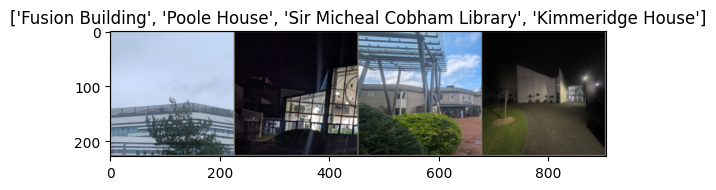

In [ ]:
def imshow(inp, title=None):
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

Visualises the models predictions from the validation phase

In [ ]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

Tests model prediction on unseen or new images passed into the img_path

In [ ]:
def testing_model_prediction(model,img_path):
    was_training = model.training
    model.eval()

    img = Image.open(img_path)
    img = data_transforms['val'](img)
    img = img.unsqueeze(0)
    img = img.to(device)

    with torch.no_grad():
        outputs = model(img)
        _, preds = torch.max(outputs, 1)

        ax = plt.subplot(2,2,1)
        ax.axis('off')
        ax.set_title(f'Predicted: {class_names[preds[0]]}')
        imshow(img.cpu().data[0])

        model.train(mode=was_training)

### Error Analysis

The functions below visualises the most correct and incorrect predictions from the validation

In [ ]:
def visualize_most_correct(model, num_images=10):
  """Visualizes the most correct predictions from the validation set."""
  was_training = model.training
  model.eval()
  images_so_far = 0
  fig = plt.figure()

  # Track predictions, labels, and correctness
  all_preds, all_labels = [], []

  with torch.no_grad():
    for i, (inputs, labels) in enumerate(dataloaders['val']):
      inputs = inputs.to(device)
      labels = labels.to(device)

      outputs = model(inputs)
      _, preds = torch.max(outputs, 1)

      # Store predictions, labels, and correctness
      all_preds.extend(preds.cpu().numpy())
      all_labels.extend(labels.cpu().numpy())

      for j in range(inputs.size()[0]):
        images_so_far += 1
        if images_so_far > num_images:
          break  # Only visualize the specified number of correct predictions

        if preds[j] == labels[j]:  # Check for correct prediction

          ax = plt.subplot(num_images // 2, 2, images_so_far)
          ax.axis('off')

          predicted = class_names[preds[j]]
          actual = class_names[labels[j]]

          ax.set_title(f'Correct \n Predicted: {predicted} \n Actual: {actual}')
          imshow(inputs.cpu().data[j])


  model.train(mode=was_training)


In [ ]:
def visualize_most_incorrect(model, num_images=10):
  """Visualizes the most incorrect predictions from the validation set."""
  was_training = model.training
  model.eval()
  images_so_far = 0
  fig = plt.figure()

  # Track predictions and labels
  all_preds, all_labels = [], []

  with torch.no_grad():
    for i, (inputs, labels) in enumerate(dataloaders['val']):
      inputs = inputs.to(device)
      labels = labels.to(device)

      outputs = model(inputs)
      _, preds = torch.max(outputs, 1)

      # Store predictions and labels
      all_preds.extend(preds.cpu().numpy())
      all_labels.extend(labels.cpu().numpy())

      for j in range(inputs.size()[0]):
        images_so_far += 1
        if images_so_far > num_images:
          break  # Only visualize the specified number of incorrect predictions

        if preds[j] != labels[j]:  # Check for incorrect prediction
          ax = plt.subplot(num_images // 2, 2, images_so_far)
          ax.axis('off')

          predicted = class_names[preds[j]]
          actual = class_names[labels[j]]

          ax.set_title(f'Incorrect \n Predicted: {predicted}, \n Actual: {actual}')
          imshow(inputs.cpu().data[j])

  model.train(mode=was_training)

### Plotting Results

Draws a line graph of the loss and accuracy

In [ ]:
def plot_loss(train_loss,val_loss, title="Loss Curve"):
        plt.figure(figsize=(10, 6))
        plt.plot(train_loss, label="Training Loss");
        plt.plot(val_loss, label="Validation Loss");
        plt.title(title)
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.legend()
        plt.grid(True)
        plt.show()

In [ ]:
def plot_accuracy(resnet18_acc, resnet34_acc, resnet50_acc, resnet101_acc, title="Accuracy Curve for Each Model"):
        plt.figure(figsize=(10, 6))
        plt.plot(resnet18_acc, label="ResNet 18");
        plt.plot(resnet34_acc, label="ResNet 34");
        plt.plot(resnet50_acc, label="ResNet 50");
        plt.plot(resnet101_acc, label="ResNet 101");
        plt.title(title)
        plt.xlabel("Epoch")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.grid(True)
        plt.show()

In [ ]:
def plot_evaluation(baseline_acc,model_acc, title="Benchmarking Accuracy Curve against Baseline"):
        plt.figure(figsize=(10, 6))
        plt.plot(baseline_acc, label="Baseline Accuracy");
        plt.plot(model_acc, label="EfficientNet Accuracy");
        plt.title(title)
        plt.xlabel("Epoch")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.grid(True)
        plt.show()

## **Identifying a Baseline Model**

### ResNet 18 Training

In [ ]:
resnet18 = models.resnet18(weights='IMAGENET1K_V1')

resnet18 = features(resnet18)

criterion, optimizer, scheduler = hyperParameters(resnet18)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 136MB/s]


In [ ]:
resnet18, loss_history_18, accuracy_history_18 = train_model(resnet18, criterion, optimizer, scheduler, num_epochs=20);

Epoch 0/19
----------
train Loss: 2.0340 Acc: 0.2812
val Loss: 0.9685 Acc: 0.7344

Epoch 1/19
----------
train Loss: 1.0939 Acc: 0.6875
val Loss: 0.4180 Acc: 0.8438

Epoch 2/19
----------
train Loss: 0.6445 Acc: 0.8125
val Loss: 0.1762 Acc: 0.9531

Epoch 3/19
----------
train Loss: 0.5700 Acc: 0.8281
val Loss: 0.1489 Acc: 0.9531

Epoch 4/19
----------
train Loss: 0.5522 Acc: 0.8229
val Loss: 0.0945 Acc: 0.9688

Epoch 5/19
----------
train Loss: 0.3522 Acc: 0.8854
val Loss: 0.0552 Acc: 0.9844

Epoch 6/19
----------
train Loss: 0.3664 Acc: 0.8958
val Loss: 0.0935 Acc: 0.9688

Epoch 7/19
----------
train Loss: 0.4443 Acc: 0.8698
val Loss: 0.0940 Acc: 0.9375

Epoch 8/19
----------
train Loss: 0.4139 Acc: 0.8594
val Loss: 0.0806 Acc: 0.9844

Epoch 9/19
----------
train Loss: 0.3030 Acc: 0.9062
val Loss: 0.0602 Acc: 0.9844

Epoch 10/19
----------
train Loss: 0.3023 Acc: 0.9323
val Loss: 0.0598 Acc: 0.9844

Epoch 11/19
----------
train Loss: 0.3070 Acc: 0.9062
val Loss: 0.0682 Acc: 0.9844

Ep

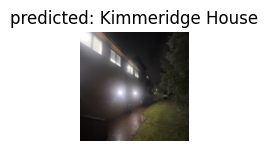

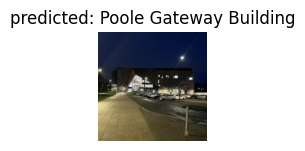

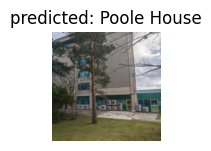

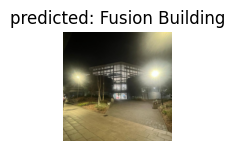

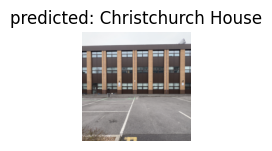

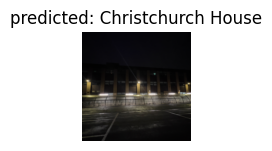

In [ ]:
visualize_model(resnet18)

In [ ]:
train_loss_18,val_loss_18 = get_loss(loss_history_18)

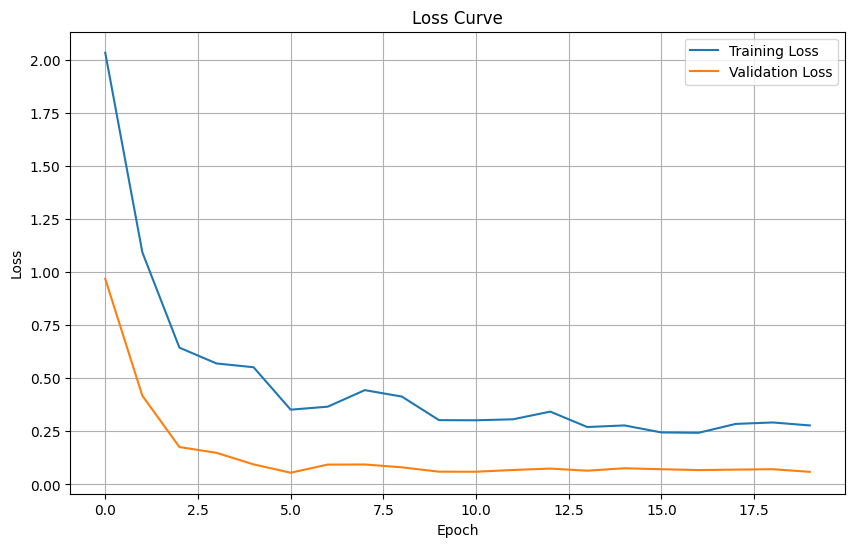

In [ ]:
plot_loss(train_loss_18,val_loss_18)

### ResNet 34 Training

In [ ]:
resnet34 = models.resnet34(weights='IMAGENET1K_V1')

resnet34 = features(resnet34)

criterion, optimizer, scheduler = hyperParameters(resnet34)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 83.8MB/s]


In [ ]:
resnet34, loss_history_34, accuracy_history_34  = train_model(resnet34, criterion, optimizer, scheduler, num_epochs=20);

Epoch 0/19
----------
train Loss: 2.0057 Acc: 0.3021
val Loss: 1.0275 Acc: 0.7344

Epoch 1/19
----------
train Loss: 0.8808 Acc: 0.7188
val Loss: 0.3263 Acc: 0.8906

Epoch 2/19
----------
train Loss: 0.7103 Acc: 0.7917
val Loss: 0.1786 Acc: 0.9375

Epoch 3/19
----------
train Loss: 0.6094 Acc: 0.8177
val Loss: 0.0944 Acc: 0.9844

Epoch 4/19
----------
train Loss: 0.5321 Acc: 0.8333
val Loss: 0.0914 Acc: 0.9688

Epoch 5/19
----------
train Loss: 0.3738 Acc: 0.8906
val Loss: 0.1317 Acc: 0.9688

Epoch 6/19
----------
train Loss: 0.3457 Acc: 0.8802
val Loss: 0.1315 Acc: 0.9375

Epoch 7/19
----------
train Loss: 0.3140 Acc: 0.8958
val Loss: 0.1153 Acc: 0.9688

Epoch 8/19
----------
train Loss: 0.3655 Acc: 0.8750
val Loss: 0.0989 Acc: 0.9531

Epoch 9/19
----------
train Loss: 0.3854 Acc: 0.8802
val Loss: 0.0742 Acc: 0.9688

Epoch 10/19
----------
train Loss: 0.1602 Acc: 0.9479
val Loss: 0.1040 Acc: 0.9375

Epoch 11/19
----------
train Loss: 0.1906 Acc: 0.9479
val Loss: 0.0794 Acc: 0.9688

Ep

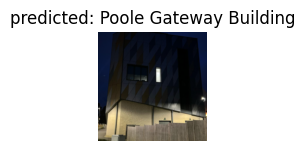

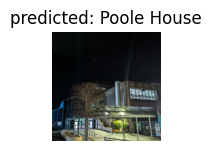

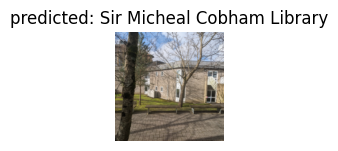

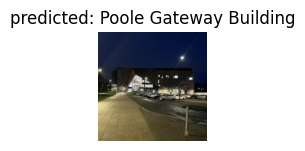

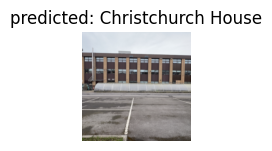

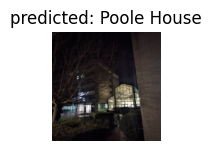

In [ ]:
visualize_model(resnet34);

In [ ]:
train_loss_34,val_loss_34 = get_loss(loss_history_34)

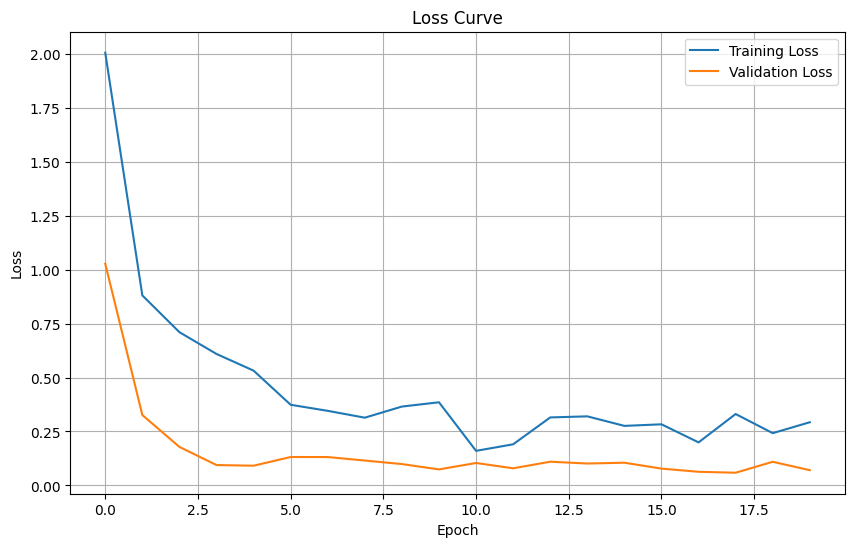

In [ ]:
plot_loss(train_loss_34,val_loss_34)

### ResNet 50 Training

In [ ]:
resnet50 = models.resnet50(weights='IMAGENET1K_V1')

resnet50 = features(resnet50)

criterion, optimizer, scheduler = hyperParameters(resnet50)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 69.6MB/s]


In [ ]:
resnet50, loss_history_50, accuracy_history_50 = train_model(resnet50, criterion, optimizer, scheduler, num_epochs=20)

Epoch 0/19
----------
train Loss: 2.0476 Acc: 0.2344
val Loss: 1.4403 Acc: 0.6094

Epoch 1/19
----------
train Loss: 1.3022 Acc: 0.5469
val Loss: 0.4474 Acc: 0.7969

Epoch 2/19
----------
train Loss: 0.7929 Acc: 0.7188
val Loss: 0.4601 Acc: 0.8594

Epoch 3/19
----------
train Loss: 0.5306 Acc: 0.8229
val Loss: 0.2078 Acc: 0.9375

Epoch 4/19
----------
train Loss: 0.4937 Acc: 0.8594
val Loss: 0.2282 Acc: 0.9375

Epoch 5/19
----------
train Loss: 0.4364 Acc: 0.8698
val Loss: 0.1065 Acc: 0.9688

Epoch 6/19
----------
train Loss: 0.3686 Acc: 0.8906
val Loss: 0.0910 Acc: 0.9531

Epoch 7/19
----------
train Loss: 0.2638 Acc: 0.9219
val Loss: 0.0892 Acc: 0.9844

Epoch 8/19
----------
train Loss: 0.2714 Acc: 0.9271
val Loss: 0.0792 Acc: 0.9844

Epoch 9/19
----------
train Loss: 0.2774 Acc: 0.9271
val Loss: 0.0631 Acc: 0.9844

Epoch 10/19
----------
train Loss: 0.2671 Acc: 0.9271
val Loss: 0.0714 Acc: 0.9844

Epoch 11/19
----------
train Loss: 0.2948 Acc: 0.9062
val Loss: 0.0552 Acc: 0.9844

Ep

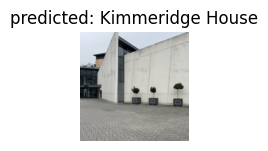

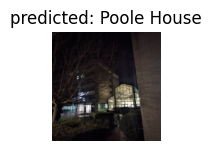

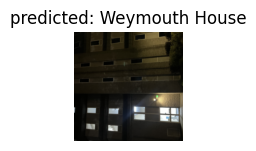

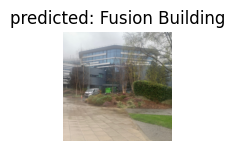

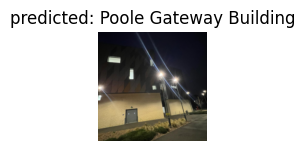

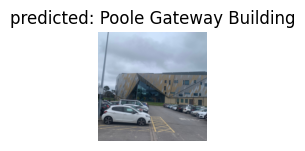

In [ ]:
visualize_model(resnet50);

In [ ]:
train_loss_50,val_loss_50 = get_loss(loss_history_50)

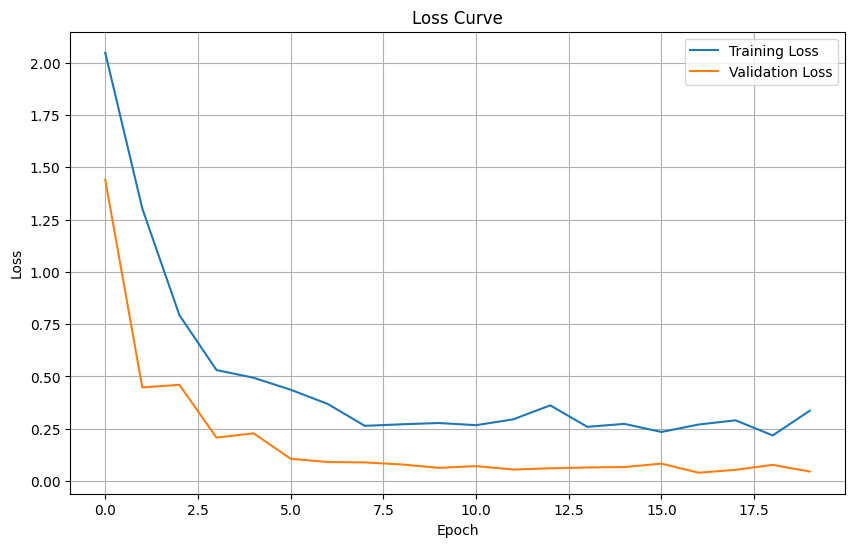

In [ ]:
plot_loss(train_loss_50,val_loss_50)

### ResNet 101 Training

In [ ]:
resnet101 = models.resnet101(weights='DEFAULT')

resnet101 = features(resnet101)

criterion, optimizer, scheduler = hyperParameters(resnet101)

Downloading: "https://download.pytorch.org/models/resnet101-cd907fc2.pth" to /root/.cache/torch/hub/checkpoints/resnet101-cd907fc2.pth
100%|██████████| 171M/171M [00:02<00:00, 60.6MB/s]


In [ ]:
resnet101, loss_history_101, accuracy_history_101 = train_model(resnet101, criterion, optimizer, scheduler, num_epochs=20)

Epoch 0/19
----------
train Loss: 2.0349 Acc: 0.1719
val Loss: 1.8768 Acc: 0.4062

Epoch 1/19
----------
train Loss: 1.7816 Acc: 0.4948
val Loss: 1.5152 Acc: 0.7656

Epoch 2/19
----------
train Loss: 1.4019 Acc: 0.6979
val Loss: 1.0053 Acc: 0.8438

Epoch 3/19
----------
train Loss: 0.9972 Acc: 0.7604
val Loss: 0.6237 Acc: 0.8750

Epoch 4/19
----------
train Loss: 0.8196 Acc: 0.8021
val Loss: 0.4331 Acc: 0.8594

Epoch 5/19
----------
train Loss: 0.6345 Acc: 0.8177
val Loss: 0.3165 Acc: 0.8750

Epoch 6/19
----------
train Loss: 0.4694 Acc: 0.8698
val Loss: 0.2549 Acc: 0.9062

Epoch 7/19
----------
train Loss: 0.3672 Acc: 0.8906
val Loss: 0.2466 Acc: 0.9219

Epoch 8/19
----------
train Loss: 0.4081 Acc: 0.8854
val Loss: 0.2218 Acc: 0.9531

Epoch 9/19
----------
train Loss: 0.4155 Acc: 0.9010
val Loss: 0.2400 Acc: 0.8906

Epoch 10/19
----------
train Loss: 0.3770 Acc: 0.9062
val Loss: 0.2474 Acc: 0.9062

Epoch 11/19
----------
train Loss: 0.3369 Acc: 0.9219
val Loss: 0.2367 Acc: 0.9375

Ep

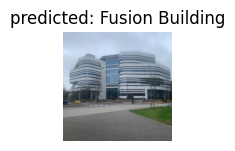

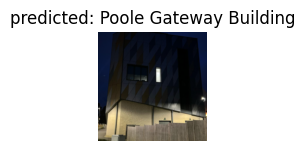

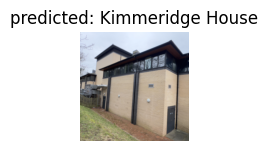

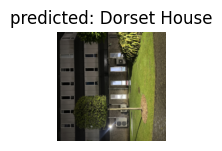

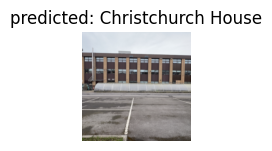

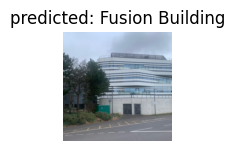

In [ ]:
visualize_model(resnet101);

In [ ]:
train_loss_101,val_loss_101 = get_loss(loss_history_101)

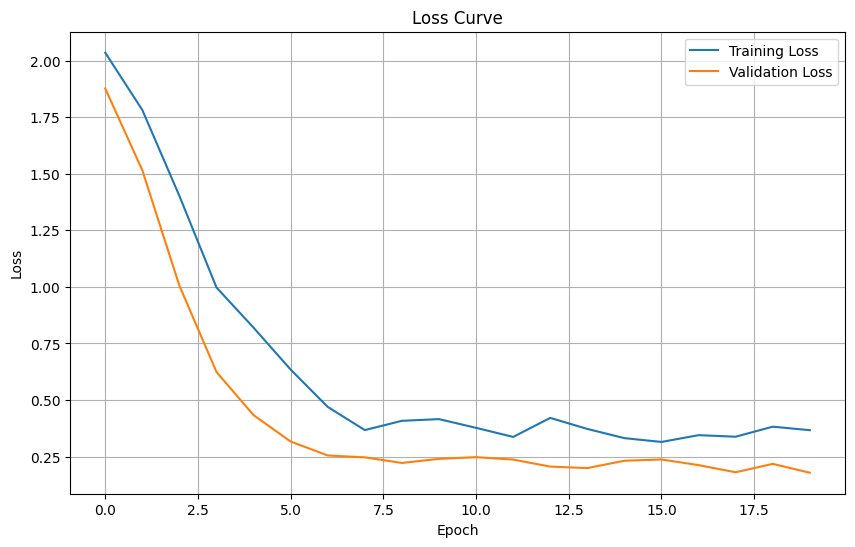

In [ ]:
plot_loss(train_loss_101,val_loss_101)

### Analysis

**Observations**

While the training graphs shows no signs of overfitting or underfitting on the training data.

The validation loss on each of the models started plateauing after the learning rate update on the 7th epoch, this could indicate good generalization.

Similarly, the constant accuracy of over 90% after the 7th epoch could reflect the model's performance on the specific validation set, but it might not translate to equally good performance on unseen data with different characteristics or new images with different acquisition patterns.


**Hypothesis**

Our hypothesis as to why the validation loss is consistently lower than the training loss in all the loss curves of each model, is that we have [an unrepresentative dataset.](https://www.baeldung.com/cs/learning-curve-ml#:~:text=One%20of%20the%20most%20widely,the%20model%20fits%20new%20data.) As the model performs better on the training set than during validation.

We also suspect this could be due to the physical limitations when acquiring the photos, some images taken from the same angle lacked enough distinction. If the same image is found the training and validation dataset, this is a form of data leakage that can cause the model to perform a lot better on the validation set

A possible solution would be to acquire more images to populate the validation set.


## **Error Analysis on each Model Prediction**

### ResNet 18 Analysis

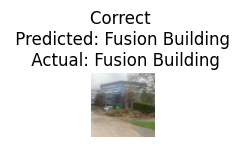

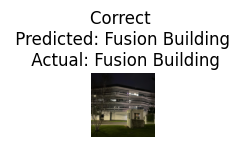

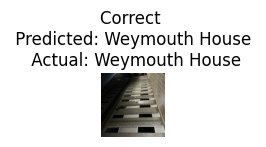

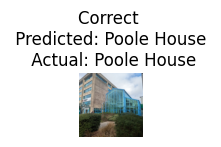

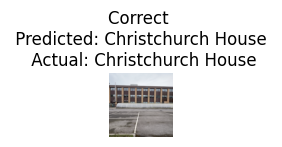

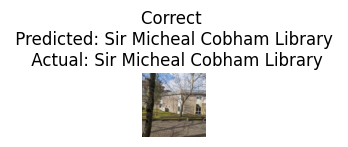

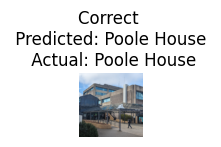

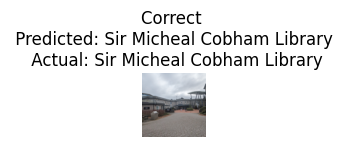

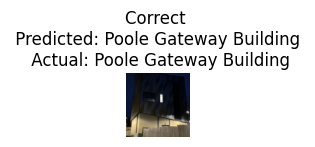

In [ ]:
visualize_most_correct(resnet18)

In [ ]:
visualize_most_incorrect(resnet18)

The model predicted none of the buildings incorrectly.


### ResNet 34 Analysis

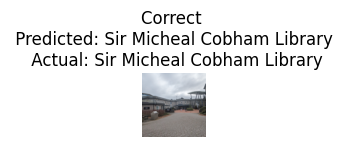

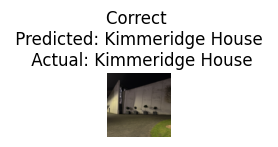

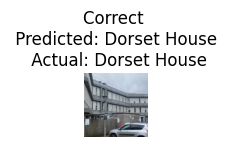

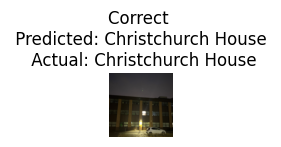

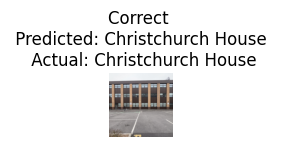

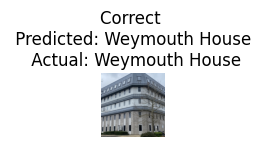

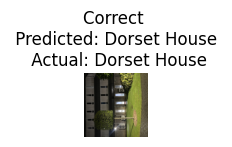

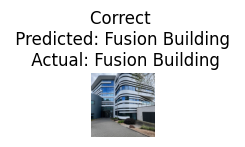

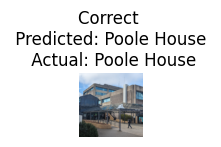

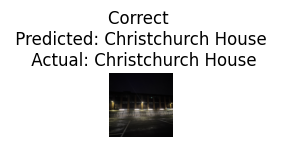

In [ ]:
visualize_most_correct(resnet34)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

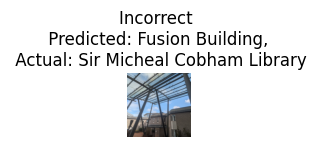

In [ ]:
visualize_most_incorrect(resnet34)

### ResNet 50 Analysis

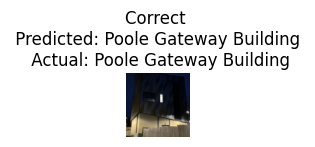

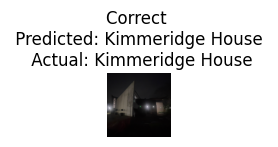

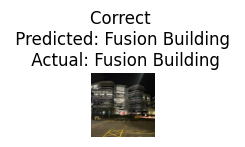

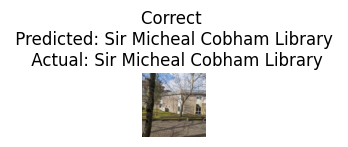

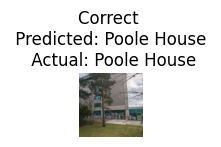

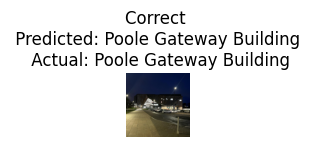

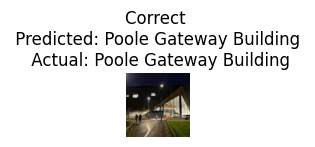

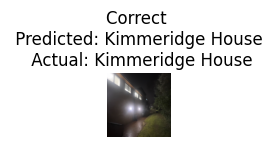

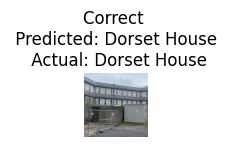

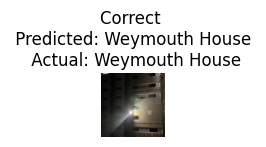

In [ ]:
visualize_most_correct(resnet50)

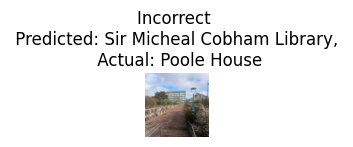

In [ ]:
visualize_most_incorrect(resnet50)

### ResNet 101 Analysis

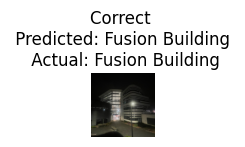

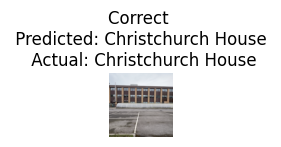

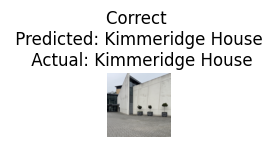

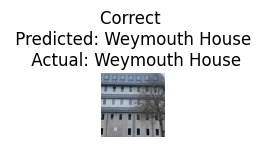

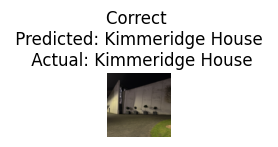

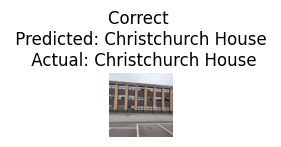

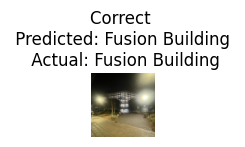

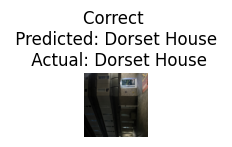

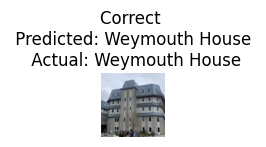

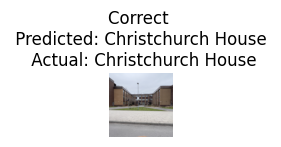

In [ ]:
visualize_most_correct(resnet101)

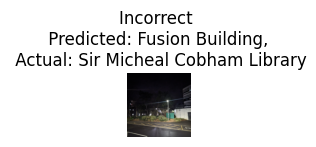

In [ ]:
visualize_most_incorrect(resnet101)

### Analysis

The models predictions for ResNet18 was correct, it predicted none incorrectly.

Every other model predicted one image incorrectly, confusing Poole House, Fusion Building and Sir Micheal Cobhams Library.

This further corroborate our hypothesis on data leakage. Where the model has over familiarized itself with the training set images.

## **Comparing Each Models Accuracy**

As we seek to get concrete information in identifying our baseline model for classification. We thought it might be worthwhile to visualize the model and understand their individual performances collectively.

### Getting Model Accuracies

In [ ]:
train_acc_18, val_acc_18 = get_accuracy(accuracy_history_18)
train_acc_34, val_acc_34 = get_accuracy(accuracy_history_34)
train_acc_50, val_acc_50 = get_accuracy(accuracy_history_50)
train_acc_101, val_acc_101 = get_accuracy(accuracy_history_101)

### Training Accuracy

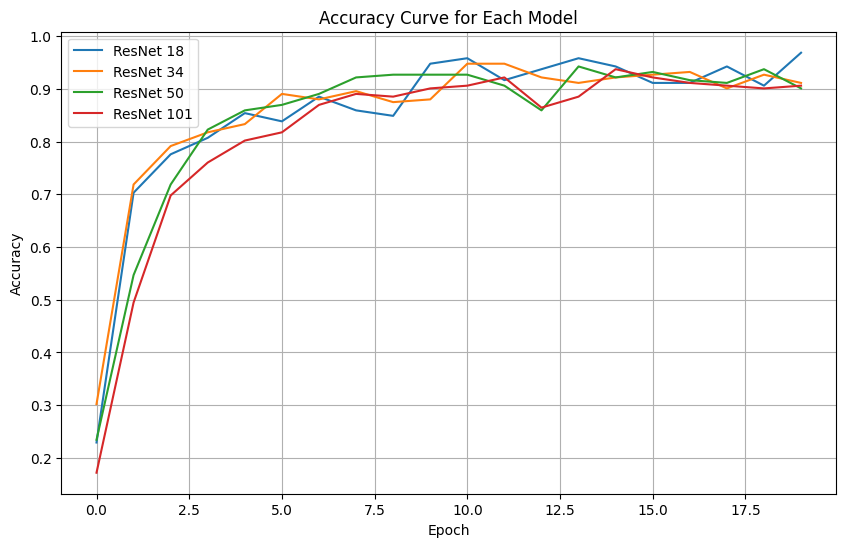

In [ ]:
plot_accuracy(train_acc_18, train_acc_34, train_acc_50, train_acc_101);

ResNet 18 performed the best on the training dataset

### Validation Accuracy

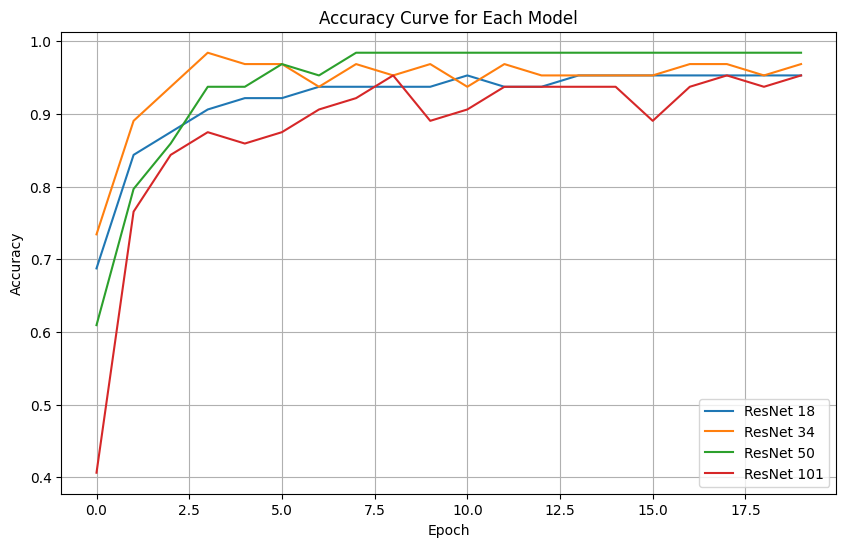

In [ ]:
plot_accuracy(val_acc_18, val_acc_34, val_acc_50, val_acc_101);

### Baseline Conclusion

Although it is difficult to entirely trust our validation accuracy due to our highlighted concerns. Notably it is evident that ResNet18 had a more balanced accuracy on the validation set as opposed to the other models with flunctuating accuracies. While ResNet 50 performs poorly during training it boasts of a more consistent accuracy during validation which suggests overfitting in the model.

**ResNet 18** was chosen as the baseline model due to its ability to better generalize to unseen data.

## **Testing Baseline Prediction on New Data**

We tested the baseline on random images obtained from the internet that wasn't collected the same way ours was. These images had a lower quality and the size of the images were significantly smaller in almost all of the cases.

It only predicted the dorset building wrongly, but its reasonable as the building shares similar structural features.

### Dorset House

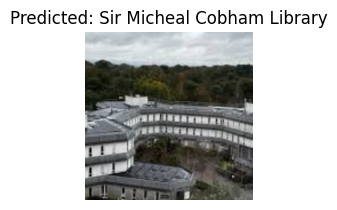

In [ ]:
testing_model_prediction(
    resnet18,
    img_path='/content/Building Classification/test/Dorset House/02.jpeg'
)

plt.ioff()
plt.show()

### Kimmeridge House

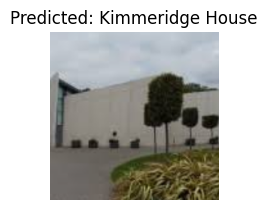

In [ ]:
testing_model_prediction(
    resnet18,
    img_path='/content/Building Classification/test/Kimmeridge House/02.jpeg'
)

plt.ioff()
plt.show()

### Poole House

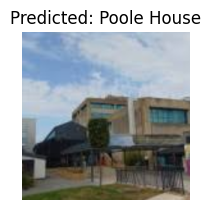

In [ ]:
testing_model_prediction(
    resnet18,
    img_path='/content/Building Classification/test/Poole House/04.jpeg'
)

plt.ioff()
plt.show()

### Christchurch House

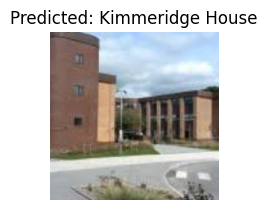

In [ ]:
testing_model_prediction(
    resnet18,
    img_path='/content/Building Classification/test/Christchurch House/02.jpeg'
)

plt.ioff()
plt.show()

### Weymouth House

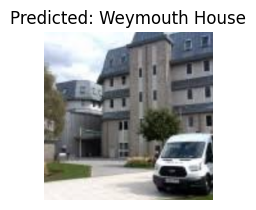

In [ ]:
testing_model_prediction(
    resnet18,
    img_path='/content/Building Classification/test/Weymouth House/04.jpeg'
)

plt.ioff()
plt.show()

### Fusion Building

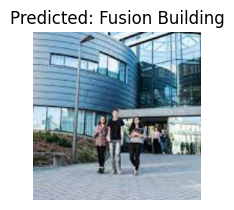

In [ ]:
testing_model_prediction(
    resnet18,
    img_path='/content/Building Classification/test/Fusion Building/01.jpeg'
)

plt.ioff()
plt.show()

### Poole Gateway Building

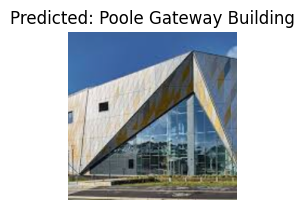

In [ ]:
testing_model_prediction(
    resnet18,
    img_path='/content/Building Classification/test/Poole Gateway Building/01.jpeg'
)

plt.ioff()
plt.show()

### Sir Micheal Cobham Library

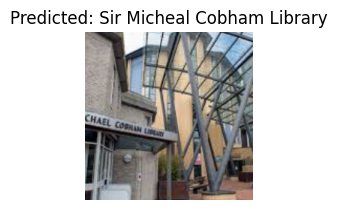

In [ ]:
testing_model_prediction(
    resnet18,
    img_path='/content/Building Classification/test/Sir Micheal Cobham Library/01.jpeg'
)

plt.ioff()
plt.show()

## **Fine-Tuning Baseline by Freezing Layers**

We attempted to fine tune the model by freezing it layers to see how it would impact the models performance

In [ ]:
freeze18 = models.resnet18(weights='IMAGENET1K_V1')

freeze18 = features(freeze18)

criterion, optimizer, scheduler = hyperParameters(freeze18)

###  Freezing the Last Layer

Here, the last layer of the pretrained ResNet model was freezed

In [ ]:
freeze_to(freeze18, -1)

In [ ]:
freeze_last, loss_history, accuracy_history = early_stopping(freeze18, criterion, optimizer, scheduler, num_epochs=20);

Epoch 0/19
----------
train Loss: 2.0950 Acc: 0.1771
Validation loss decreased (inf --> 1.957597).  Saving model ...
val Loss: 1.9576 Acc: 0.2188
Epoch 1/19
----------
train Loss: 1.8476 Acc: 0.3229
Validation loss decreased (1.957597 --> 0.971316).  Saving model ...
val Loss: 0.9713 Acc: 0.7344
Epoch 2/19
----------
train Loss: 1.3902 Acc: 0.5260
Validation loss decreased (0.971316 --> 0.821483).  Saving model ...
val Loss: 0.8215 Acc: 0.7344
Epoch 3/19
----------
train Loss: 0.9464 Acc: 0.7292
Validation loss decreased (0.821483 --> 0.427049).  Saving model ...
val Loss: 0.4270 Acc: 0.9375
Epoch 4/19
----------
train Loss: 0.9813 Acc: 0.6823
Validation loss decreased (0.427049 --> 0.379580).  Saving model ...
val Loss: 0.3796 Acc: 0.9375
Epoch 5/19
----------
train Loss: 0.7286 Acc: 0.7656
Validation loss decreased (0.379580 --> 0.353364).  Saving model ...
val Loss: 0.3534 Acc: 0.8594
Epoch 6/19
----------
train Loss: 0.6573 Acc: 0.7865
Validation loss decreased (0.353364 --> 0.3082

In [ ]:
train_loss_freeze,val_loss_freeze = get_loss(loss_history)

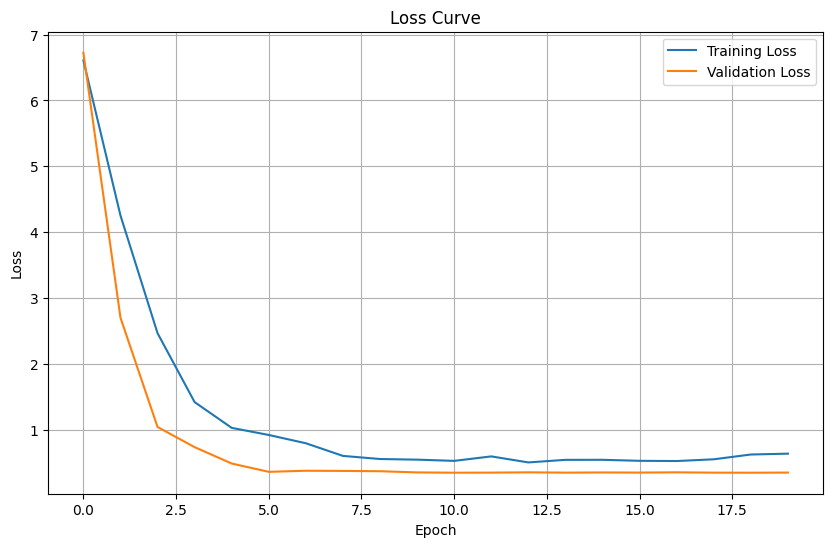

In [ ]:
plot_loss(train_loss_freeze,val_loss_freeze)

Freezing one layer reduced the training and validation loss as compared to the ResNet Model without the layers freezed.

### Freezing the last three Layers

In [ ]:
freeze18;

In [ ]:
freeze_to(freeze18, -3)

In [ ]:
freeze_third, loss_history, accuracy_history = early_stopping(freeze18, criterion, optimizer, scheduler, num_epochs=20)

Epoch 0/19
----------
train Loss: 0.5157 Acc: 0.8646
Validation loss decreased (inf --> 0.247328).  Saving model ...
val Loss: 0.2473 Acc: 0.8906
Epoch 1/19
----------
train Loss: 0.6198 Acc: 0.8177
Validation loss decreased (0.247328 --> 0.238582).  Saving model ...
val Loss: 0.2386 Acc: 0.9219
Epoch 2/19
----------
train Loss: 0.4672 Acc: 0.9219
Validation loss decreased (0.238582 --> 0.222334).  Saving model ...
val Loss: 0.2223 Acc: 0.9375
Epoch 3/19
----------
train Loss: 0.5187 Acc: 0.8750
EarlyStopping counter: 1 out of 5
val Loss: 0.2383 Acc: 0.9219
Epoch 4/19
----------
train Loss: 0.5187 Acc: 0.8542
EarlyStopping counter: 2 out of 5
val Loss: 0.2318 Acc: 0.9219
Epoch 5/19
----------
train Loss: 0.5313 Acc: 0.8542
Validation loss decreased (0.222334 --> 0.208981).  Saving model ...
val Loss: 0.2090 Acc: 0.9531
Epoch 6/19
----------
train Loss: 0.4527 Acc: 0.8906
EarlyStopping counter: 1 out of 5
val Loss: 0.2156 Acc: 0.9219
Epoch 7/19
----------
train Loss: 0.5028 Acc: 0.8646


In [ ]:
train_loss_freeze,val_loss_freeze = get_loss(loss_history)

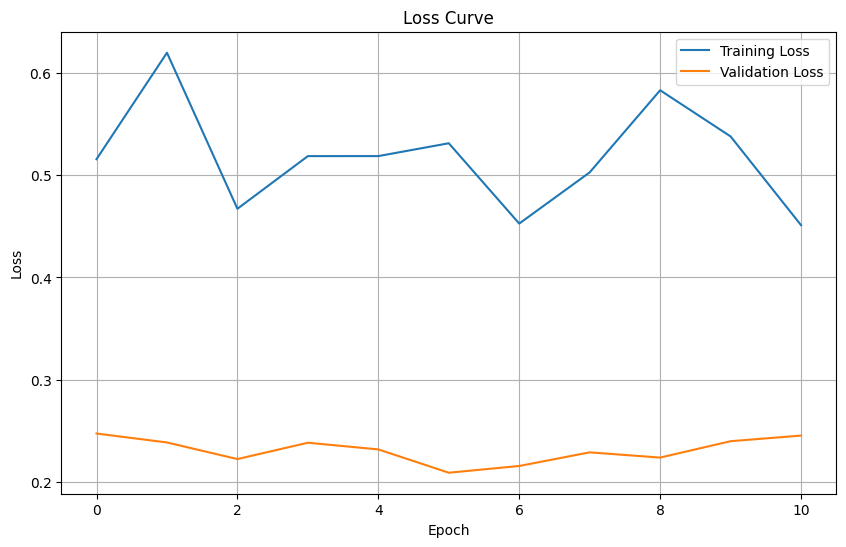

In [ ]:
plot_loss(train_loss_freeze,val_loss_freeze)

Freezing three layers made it very difficult for the model to learn

## **Evaluating Baseline against EfficientNet**

In [ ]:
# Define EfficientNet model for feature extraction
EfficientNet = EfficientNet.from_pretrained('efficientnet-b0')

EfficientNet = netFeatures(EfficientNet)

criterion, optimizer, scheduler = hyperParameters(EfficientNet)

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth
100%|██████████| 20.4M/20.4M [00:00<00:00, 184MB/s]

Loaded pretrained weights for efficientnet-b0


In [ ]:
EfficientNet, loss_history, accuracy_history = train_model(EfficientNet, criterion, optimizer, scheduler, num_epochs=20)

Epoch 0/19
----------
train Loss: 6.6074 Acc: 0.0104
val Loss: 6.7239 Acc: 0.0000

Epoch 1/19
----------
train Loss: 4.2534 Acc: 0.2969
val Loss: 2.7016 Acc: 0.4375

Epoch 2/19
----------
train Loss: 2.4659 Acc: 0.4844
val Loss: 1.0419 Acc: 0.7344

Epoch 3/19
----------
train Loss: 1.4195 Acc: 0.6406
val Loss: 0.7355 Acc: 0.8594

Epoch 4/19
----------
train Loss: 1.0284 Acc: 0.7604
val Loss: 0.4871 Acc: 0.9062

Epoch 5/19
----------
train Loss: 0.9203 Acc: 0.7760
val Loss: 0.3607 Acc: 0.9375

Epoch 6/19
----------
train Loss: 0.7947 Acc: 0.7969
val Loss: 0.3775 Acc: 0.9219

Epoch 7/19
----------
train Loss: 0.6027 Acc: 0.8438
val Loss: 0.3748 Acc: 0.9219

Epoch 8/19
----------
train Loss: 0.5554 Acc: 0.8802
val Loss: 0.3700 Acc: 0.9375

Epoch 9/19
----------
train Loss: 0.5458 Acc: 0.8333
val Loss: 0.3521 Acc: 0.9531

Epoch 10/19
----------
train Loss: 0.5272 Acc: 0.8438
val Loss: 0.3476 Acc: 0.9531

Epoch 11/19
----------
train Loss: 0.5952 Acc: 0.8490
val Loss: 0.3488 Acc: 0.9531

Ep

In [ ]:
train_loss_ef,val_loss_ef = get_loss(loss_history)

In [ ]:
train_acc_ef,val_acc_ef = get_accuracy(accuracy_history)

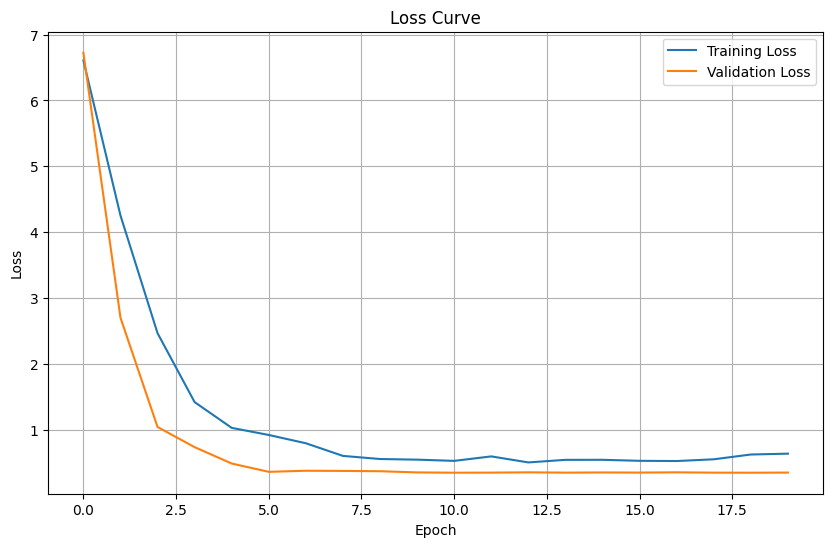

In [ ]:
plot_loss(train_loss_ef,val_loss_ef)

EfficientNet shows good promise as the discrepancy between both losses are a lot lesser than the ResNet Models, the validation loss plateaued early indicating it was able to learn fast and predict the validation set with relative ease.

### Plotting both Training and Validation Accuracies

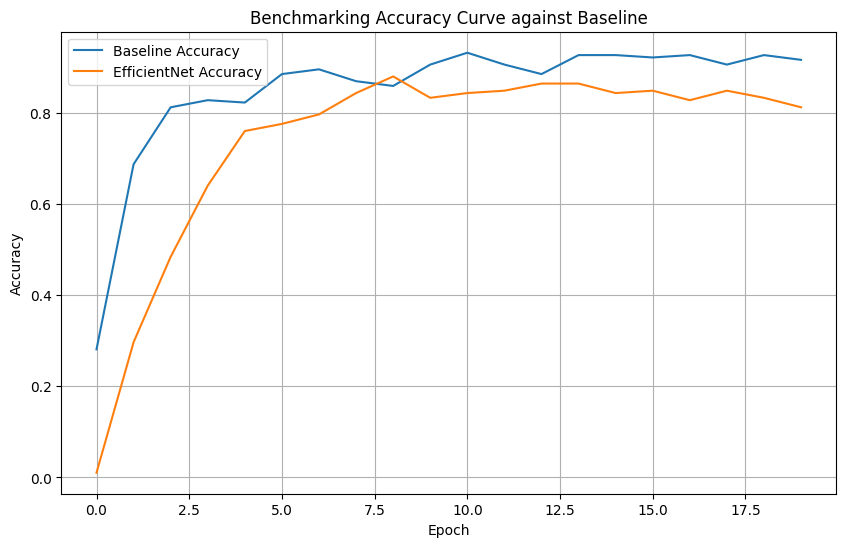

In [ ]:
plot_evaluation(train_acc_18, train_acc_ef)

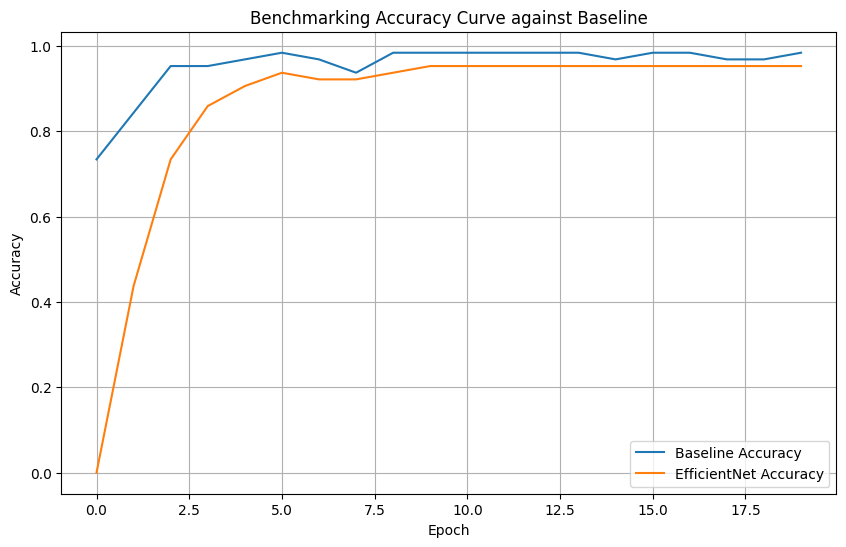

In [ ]:
plot_evaluation(val_acc_18, val_acc_ef)

The training and accuracy graphs for the baseline and EfficientNet are very similar in structure. But this reveals that ResNet 18 and Efficient Net are both suitable models for our classification task, but the ResNet 18 model has an edge due to its ability to generalize well to unseen data.

# **Bounding Box Prediction using Baseline**

Having obtained the best network to use for transfer learning (Resnet18), the team proceeded to utilize the network to perform detection.

## Environment Variables

The environmental variables are defined here for easy reference as they are used across this section extensively. The scaling factor used to define the original image, as well as the names of the building are defined here.

In [ ]:
#0.2 is our scaling factor here because when images are scaled by this much, the
#team can just make out what the image is while saving precious storage space.
scaling_factor = 0.2
assert scaling_factor < 1, "The Scaling Factor must always be less than 1"
building_names =["The_Sir_Michael_Cobham_Library", "Dorset", "Poole_House",
                   "Christchurch", "Kimmeridge", "Weymouth", "Fusion", "Poole_Gateway"]

## Detection: Helper Functions

The helper functions here are implemented to perform different actions needed over the course of this section.The team tried to ensure that the majority of functions defined in this section were [Pure](https://www.studysmarter.co.uk/explanations/computer-science/functional-programming/pure-function/#:~:text=In%20Python%2C%20a%20pure%20function,solely%20on%20its%20input%20arguments.)

In [ ]:
#This function receives a path and if the path ends with '/'
#it will remove it.
def sanitize_path(path):
  if path.endswith("/"):
    path = path[-1]
  return path

#This function is used to retreive the paths to images present in a parent folder
#By default, its parameters are initialized to a string and it is specified that
#the images have annotations.
def get_paths_to_images(parent_folder_name = "Coco_CV_Data", include_annotations=True):
  #The paths to images are initialized to sets because we need to ensure that each
  #path leads to a unique image
  paths_to_images_folder = set()
  paths_to_annotations_folder = set()
  image_paths = set()
  annot_paths = set()

  #Iterate through all folders in thr parent directory
  for folder_path in os.listdir(parent_folder_name):

    #Create a a path to the containing the image metadata for each building
    image_meta_path = parent_folder_name + "/" + folder_path

    #For each image meta data retrieve the folder paths to their images
    #and then their annotations.
    for img_meta in os.listdir(image_meta_path):
      img_path_folder = image_meta_path + "/Images"
      annot_path_folder = image_meta_path + "/Annotation"

      #For each image in the image path, create the full path and add it to the
      #image path set
      for img_name in os.listdir(img_path_folder):
        full_img_path = img_path_folder + "/" + img_name
        image_paths.add(full_img_path)

      #Do the same for the annotation paths
      for annot_name in os.listdir(annot_path_folder):
        full_annot_path = annot_path_folder + "/" + annot_name
        annot_paths.add(full_annot_path)

  #finally convert the set of image and annot paths to lists and return them
  return [list(image_paths), list(annot_paths)]

#This function takes an image and plots it using matplotlib
def show_img(im, ax=None, figsize=(8,8)):
    if not ax: _,ax = plt.subplots(1,1,figsize=figsize)
    if len(im.shape)==2: im = np.tile(im[:,:,None], 3)
    ax.imshow(im[:,:,::-1]);
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    return ax

#Ths function displays multiple images in a grid using matplotlib
def show_imgs(ims, rows=1, figsize=(16,8)):
    _,ax = plt.subplots(rows, len(ims)//rows, figsize=figsize)
    [show_img(im,ax_) for im,ax_ in zip(ims,ax.flatten())]
    return ax

#This is a pure function that resizes an image using open cv
def resize_img(sourceImage=None):
  #Check if the image is not null
  assert sourceImage is not None, "Please check that the sourceImage is not null"
  #Retreive new width and height, resize the image and then return the new image
  newWidth = int(sourceImage.shape[1] * scaling_factor)
  newHeight = int( sourceImage.shape[0] * (newWidth / sourceImage.shape[1]) )
  resizedImage = cv.resize(sourceImage, (newWidth, newHeight))
  return resizedImage

#This code resizes and  saves images given an input and output path
def resize_save_images(input_file_path, output_file_path):
  #Ensure that the input path is file
  if os.path.isfile(input_file_path):

  #If the output path does not exist create it
    if not os.path.exists(output_file_path):
      os.makedirs(output_file_path)

    #retrieve the image to resize and ensure its loaded in
    image= cv.imread(input_file_path)
    assert image is not None, (input_file_path + " is invalid")
    #Resize the image
    resizedImage = resize_img(image)

    #Retrieve the file name and proceed to save the image under the output
    file_name = get_file_name_from_path(input_file_path)
    cv.imwrite((output_file_path + file_name), resizedImage)

  #Raise exception if the path is incorrect
  else:
    raise Exception(f"Please ensure your input path '{input_file_path}' is correct")

def resize_annotation(JSONPath):
  #Ensure that the annotation exists, open it and then load it as an annotation
  if os.path.exists(JSONPath):
    rawJSONFile = open(JSONPath)
    annotat = json.load(rawJSONFile)
    assert isinstance(annotat, dict), "The loaded annotation is invalid"

    #Continue to resize all data points in the JSON
    for image_data in annotat["_via_img_metadata"].values():
      for index, regions in enumerate(image_data['regions']):
        image_data["regions"][index]['shape_attributes'] = resize_data_point(regions['shape_attributes'])
    return (annotat)

  #If Data Point doesnt exist raise exception
  else:
    raise Exception(f"Please ensure your input path /'{JSONPath}' is correct")

#This fucntion retrieves an annotation and saves it under the annotat_file_path
#as a JSON file
def save_annotation(annotat, annotat_file_path):
    # Create the directory if it doesn't exist
    os.makedirs(os.path.dirname(annotat_file_path), exist_ok=True)
    with open(annotat_file_path, 'w+') as json_file:
        json.dump(annotat, json_file, indent=4)

#This function receives a single data point and resizes it in line with the scaling factor
def resize_data_point(data_point):
  #Retrieve Data Point's name
  data_point_type = data_point['name']

  #We used only rectangles in our simplified annotations so we don't need to resize polygons :)
  if data_point_type == "rect":
    resized_x_value = int(data_point['x'] * scaling_factor)
    resized_y_value = int(data_point['y'] * scaling_factor)
    resized_width_value = int(data_point['width'] * scaling_factor)
    resized_height_value = int(data_point['height'] * scaling_factor)
    return { **data_point,'x':resized_x_value, 'y': resized_y_value, 'width': resized_width_value, 'height':resized_height_value}
  else:
    raise Exception(f"Only Rectangles are supported")

#This function using regex  to retrieve the name of a building from it's file name
def get_building_name_from_file(filename):
    pattern = r'^(Christchurch|Poole_House|Dorset|Kimmeridge|Weymouth|The_Sir_Michael_Cobham_Library|Fusion|Poole_Gateway)'
    match = re.search(pattern, filename)
    if match:
        return match.group(1)
    else:
        return None

#This function gets the file name from a path to a file
def get_file_name_from_path(file_path):
  file_name = os.path.basename(file_path)
  return file_name

#This function gets the building name from the ful path. I think it's a tautology
#but let's allow this function duplication
def get_building_name_from_fullpath(full_path):
    patterns = [
        r'The_Sir_Michael_Cobham_Library',
        r'Dorset',
        r'Poole_House',
        r'Christchurch',
        r'Kimmeridge',
        r'Weymouth',
        r'Fusion',
        r'Poole_Gateway'
    ]

    for pattern in patterns:
        match = re.search(pattern, full_path)
        if match:
            return match.group()
    return None

#Using the array defined in the environment variables, this function encodes a
#building name using the index as the class.
def get_encoded_class(name):
  norm_name = re.sub(' ', '_', name)
  return building_names.index(norm_name)

#This retrieves the class of the category using the index and building_name array
#defined in the environment variables.
def get_category_from_code(num):
  if(num >= 0 and num <= 7):
    return building_names[num]
  else:
    raise Exception (f"{num} passed must be between 0 and 7 (number of buildings)")

#This function retrieves the image path from an annotaation
def get_image_path_from_annot(annotation_path):
    filename = annotation_path.split("/")[-1]
    image_filename = filename.replace(".json", ".jpg")

    image_path = "Building_Classification/Images/" + image_filename

    return image_path

##Data Cleaning: Resize Images And Annotations

Given that the images were captured on Smart phones, the images and their annotations were on a scale that contained information. As thus, both were rescaled and saved in a folder called Min (Minfiied) Dataset.

In [ ]:
#Retrieve the large image and annotation paths
raw_images_paths, raw_annot_paths = get_paths_to_images("Raw_Images_And_Annotations")
parent_path = "Min_Dataset"

#if parent path doesn't exist, create it otherwise overwrite it
if not os.path.exists(parent_path):
  os.makedirs(parent_path)
else:
  os.system(f"rm -rf {parent_path}")
  print(f"Removed existing {parent_path}")

#Perform the resizing using each image present in the raw img dir and save them
for img_path in raw_images_paths:
  folder_name = get_building_name_from_fullpath(img_path)
  img_output_path = parent_path + "/" + folder_name + "/Images/"

  if not os.path.exists(img_output_path):
    os.makedirs(img_output_path)

  resize_save_images(img_path, img_output_path)

#Perform the resizing operation on the annoations
for annot_path in raw_annot_paths:
  folder_name = get_building_name_from_fullpath(annot_path)
  annot_output_path = parent_path + "/" + folder_name + "/Annotations/" + get_file_name_from_path(annot_path)

  #Save the resized annotation
  save_annotation(resize_annotation(annot_path), annot_output_path)

##Create Final Pascal VOC Dataset

To actually perform the Bounding Box training, we needed to transform our now resized images, into a compatible format that is the [Pascal VOC format](https://docs.cvat.ai/docs/manual/advanced/formats/format-voc/#:~:text=The%20Pascal%20VOC%20(Visual%20Object,adopted%20in%20computer%20vision%20tasks.).This provided the team with a standardized format to store and retrieve all the data we collected. It should be however noted that instead of XML, the team elected to stick with JSON for our VOC conversion.

###Split Entire Dataset Into 1 Annotation/Image

In [ ]:
#We no longer need the Raw folder
!rm -rf  Raw_Images_And_Annotations

In [ ]:
#The final folder is called Building_Classification
parent = "Min_Dataset"
new_parent = "Building_Classification"

#We define the path to the new Annotations and Images in line the Pascal VOC format.
path_to_new_annotations = new_parent + "/Annotations/"
path_to_new_images = new_parent + "/Images/"

#If the parent directory doesn't exist create it. If it does, overwrite it
if not os.path.exists(new_parent):
  os.makedirs(new_parent)
else:
  os.system(f"rm -rf {new_parent}")
  print(f"Removed existing {new_parent}")

#Iterate through the building paths in the Min Dataset
for building_path in os.listdir("Min_Dataset"):
  #Rebuild the path to JSON
  path_to_json = parent + "/" + building_path + "/Annotations/" + building_path + ".json"

  #Open the JSON file and load it in
  with open(path_to_json, "r") as json_file:
      annotat =  json.load(json_file)
      annots_per_image = []

      #Iterate through the image_date present, create the VOC format and save it
      for index, image_data in enumerate(annotat["_via_img_metadata"].values()):
        #Retrieve the filel name and current building name
        curr_image_name = image_data["filename"]
        curr_build_name = get_building_name_from_file(image_data["filename"])

        #Rebuild the full image path
        full_image_path = parent + "/Images/" + curr_build_name + "/" + curr_image_name

        #Extract the region data
        for region_data in image_data["regions"]:
        #B_Box is in order of X, Y, Width and Height
         b_box_details ={
            "x_min":  region_data["shape_attributes"]['x'],
            "y_min" :  region_data["shape_attributes"]['y'],
            "width" : region_data["shape_attributes"]['width'],
            "height" : region_data["shape_attributes"]['height']
         }

         #Encode the class from the Building name
         label_class = get_encoded_class(region_data[ "region_attributes"]["name"])

         #Create the base name by combing the Class with the index
         base_name = str(label_class) + "_" + str(index + 1)

         #Create a dictionary that we will later reduce to JSON
         json_data = {"class": label_class, "b_box": b_box_details}
         json_name = base_name + ".json"

         #Get the path to the new JSON
         new_json_path = path_to_new_annotations + "/" + json_name
         #Get the image name by adding jpg to the base name
         new_image_name = base_name + ".jpg"

         #Get the paths to the old and new images
         path_to_old_image = parent + "/" + curr_build_name + "/" +"Images/" + curr_image_name
         path_to_new_image = path_to_new_images + "/" + new_image_name

        #If the paths to the new annotations and images do not exist, create both
        #recursively
         if not os.path.exists(path_to_new_annotations):
          os.makedirs(path_to_new_annotations)

         if not os.path.exists(path_to_new_images):
          os.makedirs(path_to_new_images)

        #finally open a JSON with the path to the JSON,
        #if it exists overwrite i
         with open(new_json_path, 'w+') as json_file:
            json.dump(json_data, json_file, indent=4)

         #Fetch the image to rename and finally save it
         image_to_rename = cv.imread(path_to_old_image)
         cv.imwrite(path_to_new_image, image_to_rename)

In [ ]:
#Remove the Min_Dataset as we no longer need it
!rm -rf  Min_Dataset

###Testing The PASCAL VOC Split

We can quickly do some validation on our Pascal VOC format by loading in images. The names are in the order "Class_Name" + "Index. In this case 0 is the Sir Michael Cobham Library.

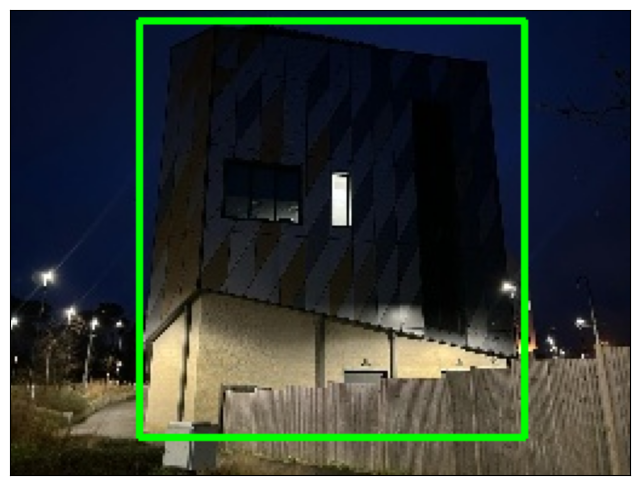

In [ ]:
number = "7_32"
with open(f"/content/Building_Classification/Annotations/{number}.json", "r") as json_file:
  annot = json.load(json_file)
  x_min = annot["b_box"]["x_min"]
  y_min = annot["b_box"]["y_min"]
  width = annot["b_box"]["width"]
  height = annot["b_box"]["height"]

  samp_img =cv.imread(f"Building_Classification/Images/{number}.jpg")

  cv.rectangle(samp_img, (x_min, y_min), (x_min + width, y_min + height), (0, 255, 0), 2)
  show_img(samp_img)

##Classification and Bounding Box Prediction

Given that the dataset has been prepared we can proceed to perform the Classification and Bounding Box Prediction.

### Generate Data Frame

We need to take the images we prepared, and the Pascal VOC JSON files and use them to create a data frame that represents our problem.

In [ ]:
#This function iterates through all the subdirectories in a root file and retrieves
#the path for that file if the are of a certain file type e.g. JSON or .jpg
def list_of_all_images(root, file_type=".jpg"):
    return [os.path.join(directory_path, f) for directory_path, directory_name,
            files in os.walk(root) for f in files if f.endswith(file_type)]

#This function builds the data frame by retreiving the Pascal VOC, decomposing it
#into filepath, bounding box values and then returning a data frame containing all this
#processed data.
def gen_build_df(annot_path):
    annotations = list_of_all_images(annot_path, '.json')
    annot_list = []
    for annot_path in annotations:
      with open(annot_path, "r") as json_file:
        raw_annot_json =  json.load(json_file)
        new_anno  = {}
        new_anno["filename"] = get_image_path_from_annot(annot_path)
        new_anno["width"] = raw_annot_json["b_box"]["width"]
        new_anno["height"] = raw_annot_json["b_box"]["height"]
        new_anno["class"] = raw_annot_json["class"]
        new_anno["x_min"] = raw_annot_json["b_box"]["x_min"]
        new_anno["y_min"] = raw_annot_json["b_box"]["y_min"]
        new_anno["x_max"] = int(raw_annot_json["b_box"]["x_min"]) + int(new_anno["width"])
        new_anno["y_max"] = raw_annot_json["b_box"]["y_min"] + int(new_anno["height"])

        annot_list.append(new_anno)
    return pd.DataFrame(annot_list)

In [ ]:
#We can go ahead and build the Data frame (df). We are expecting it to have a shape
#of (Total Instances, No of Classes), so (256,8)
df = gen_build_df("Building_Classification")
df.shape

(256, 8)

In [ ]:
#Let's look into the data
df

filename  width  height  class  x_min  \
0    Building_Classification/Images/6_24.jpg    149      68      6     57   
1    Building_Classification/Images/3_28.jpg    781     315      3      7   
2    Building_Classification/Images/4_15.jpg    733     487      4     70   
3     Building_Classification/Images/2_1.jpg    598     245      2    171   
4    Building_Classification/Images/7_28.jpg    188     145      7      5   
..                                       ...    ...     ...    ...    ...   
251   Building_Classification/Images/7_3.jpg    130      93      7     76   
252  Building_Classification/Images/2_22.jpg    813     321      2      1   
253   Building_Classification/Images/5_5.jpg    562     286      5    100   
254  Building_Classification/Images/4_27.jpg    638     325      4      2   
255  Building_Classification/Images/7_18.jpg    139      45      7     73   

     y_min  x_max  y_max  
0       48    206    116  
1      200    788    515  
2        4    803    491  
3      261    769    506  
4       23    193    168  
..     ...    ...    ...  
251    110    206    203  
252     43    814    364  
253     58    662    344  
254     91    640    416  
255     55    212    100  

[256 rows x 8 columns]

In [ ]:
#We can check for null values
df.isnull().sum()

filename    0
width       0
height      0
class       0
x_min       0
y_min       0
x_max       0
y_max       0
dtype: int64

In [ ]:
#Let's check our shape one last time to ensure equal representation of all
#classes
df['class'].value_counts()

class
6    32
3    32
4    32
2    32
7    32
0    32
1    32
5    32
Name: count, dtype: int64

### Additional Convenience Functions

Here we define more convenience functions to aid us in traning our chosen model.

In full disclosure, the template from which we kick started this training was acquired from [here](https://towardsdatascience.com/bounding-box-prediction-from-scratch-using-pytorch-a8525da51ddc).

In [ ]:
#This function takes the bounding box (bb) and image, extracts the number of rows and
#cols to create a mask. This mask converts the bb to an integer and proceeds to
# set the points within the mask shape to 1 for every where it's values fall within the values
# of the bounding box. It finally returns the mask shape.
def create_mask(bb, image):
    rows,cols,*_ = image.shape
    mask_shape = np.zeros((rows, cols))
    bb = bb.astype(int)
    mask_shape[bb[0]:bb[2], bb[1]:bb[3]] = 1.
    return mask_shape

#This code simply reads an image with a file name and changes the image's pixel
#representation from BGR to RGB.
def read_image(file_name):
  path = "./Building_Classification/Images/" + file_name
  return cv.cvtColor(cv.imread(path), cv.COLOR_BGR2RGB)

#This function takes the mask and turns it back into Bounding boxes (bb). It finds
#non-zero elements and picks the 4 corners of the bb using np.min and np.max
#methods. After doing this, it returns the new bbs.
def mask_to_bb(mask_shape):
  cols, rows = np.nonzero(mask_shape)
  if len(cols) ==0:
    return np.zeros(4, dtype=np.float32)
  top_row = np.min(rows)
  left_col = np.min(cols)
  bottom_row = np.max(rows)
  right_col = np.max(cols)
  return np.array(
      [left_col, top_row, right_col, bottom_row],
      dtype=np.float32
 )

#This function takes a row from the data frame and returns the values of the
#bounding box from the columns that correspond to these indices.
def create_bb_array(values):
  #so y_min, x_min, y_max, x_max in this order
  return np.array([values[5], values[4], values[7], values[6]])

#This function resizes and saves images in the bounding box to ensure that all
#images when passed to the model are the same. To do this, it takes a read path,
#write path, bb and the target size. It returns the str to the new path and the
#mask of the bb to be used in when applying transformations.
def resize_image_bb(read_path,write_path,bb,sz):
    im = read_image(read_path)
    im_resized = cv.resize(im, (int(1.49*sz), sz))
    Y_resized = cv.resize(create_mask(bb, im), (int(1.49*sz), sz))
    new_path = write_path / read_path
    cv.imwrite(str(new_path), cv.cvtColor(im_resized, cv.COLOR_RGB2BGR))
    return str(new_path), mask_to_bb(Y_resized)

#This function takes an iamge and crops it based on the coordinates provided.
#It returns the cropped image
def crop(img, start_row, c, target_r, target_c):
    return img[start_row:start_row + target_r, c:c+target_c]

#This function performs a random crop on an image. It does this by taking the
#image and a variable responsible for the size of random crop to be performed.
#It uses this variable, pix_num, to cut out rows and columns from the image before
#calling the crop() function
def random_crop(img, pix_num=8):
    r, c,*_ = img.shape
    lr_crop = round(pix_num * c/r)
    rand_r = random.uniform(0, 1)
    rand_c = random.uniform(0, 1)
    start_r = np.floor(2*rand_r*pix_num).astype(int)
    start_c = np.floor(2*rand_c*lr_crop).astype(int)
    return crop(img, start_r, start_c, r-2*pix_num, c-2*lr_crop)

#This function is similar to random crop but the random component is removed completely.
#As thus, it performs a center crop
def center_crop(x,  pix_num=8):
    r, c,*_ = x.shape
    c_pix = round( pix_num*c/r)
    return crop(x,  pix_num, c_pix, r-2* pix_num, c-2*c_pix)

#This function takes an image im, the degrees of rotation, a boolean flag to perform
# keep borders constant. It claculates the Rotation matrix and finally returns the
#rotated image
def rotate_cv(im, deg, y=False, mode=cv.BORDER_REFLECT, interpolation=cv.INTER_AREA):
    r,c,*_ = im.shape
    M = cv.getRotationMatrix2D((c/2,r/2),deg,1)
    if y:
        return cv.warpAffine(im, M,(c,r), borderMode=cv.BORDER_CONSTANT)
    return cv.warpAffine(im,M,(c,r), borderMode=mode, flags=cv.WARP_FILL_OUTLIERS+interpolation)

#This function takes x (the image to be cropped), Y (the bb) and performs a  random
#crop on both before returning them.
def random_cropXY(x, Y, r_pix=8):
    r, c,*_ = x.shape
    c_pix = round(r_pix*c/r)
    rand_r = random.uniform(0, 1)
    rand_c = random.uniform(0, 1)
    start_r = np.floor(2*rand_r*r_pix).astype(int)
    start_c = np.floor(2*rand_c*c_pix).astype(int)
    xx = crop(x, start_r, start_c, r-2*r_pix, c-2*c_pix)
    YY = crop(Y, start_r, start_c, r-2*r_pix, c-2*c_pix)
    return xx, YY

#This function takes the path to an image (the resized image), the bbx, and a
# transforms param. If the transforms param is passed then the transformations
#i.e. rotates, random crops will be performed on the image and it's bbx. After this
#both the image and bbx will be returned.
def transformsXY(path, bb, transforms):
    x = cv.imread(str(path)).astype(np.float32)
    x = cv.cvtColor(x, cv.COLOR_BGR2RGB)/255
    Y = create_mask(bb, x)
    if transforms:
        rdeg = (np.random.random()-.50)*20
        x = rotate_cv(x, rdeg)
        Y = rotate_cv(Y, rdeg, y=True)
        if np.random.random() > 0.5:
            x = np.fliplr(x).copy()
            Y = np.fliplr(Y).copy()
        x, Y = random_cropXY(x, Y)
    else:
        x, Y = center_crop(x), center_crop(Y)
    return x, mask_to_bb(Y)
#This function takes a bbx a preferred color and destructively draws a rectangle
# at the coords of the bbx. Observe it follows the same y_min, x_min, y_max, x_max,
# when drawing the rectangle
def create_corner_rect(bb, color='red'):
    bb = np.array(bb, dtype=np.float32)
    return plt.Rectangle((bb[1], bb[0]), bb[3]-bb[1], bb[2]-bb[0], color=color,
                         fill=False, lw=3)
#This function takes an im and the bb and shows the image. Afterwards it uses the
# method aboce to visualize the bb on the image. This function is useful for testing
#and evaluation
def show_corner_bb(im, bb):
    plt.imshow(im)
    plt.gca().add_patch(create_corner_rect(bb))

### Resize all images in Frames to Same Dimensions

Here we resize all images to a particular dimension to allow our Resnet model to be able to train. We make sure to upate the df with the new paths for the bb and images. This is what we will pass to the model as our features.

In [ ]:
new_paths = []
new_bbs = []
!rm -rf './Building_Classification/Resized_Images'

train_path_resized = Path('./Building_Classification/Resized_Images')
os.makedirs(train_path_resized)
for index, row in df.iterrows():
    file_name = get_file_name_from_path(row['filename'])
    new_path,new_bb = resize_image_bb(file_name, train_path_resized, create_bb_array(row.values),300)
    new_paths.append(new_path)
    new_bbs.append(new_bb)
df['new_path'] = new_paths
df['new_bb'] = new_bbs

In [ ]:
#Let's see our augmented df
df

filename  width  height  class  x_min  \
0    Building_Classification/Images/6_24.jpg    149      68      6     57   
1    Building_Classification/Images/3_28.jpg    781     315      3      7   
2    Building_Classification/Images/4_15.jpg    733     487      4     70   
3     Building_Classification/Images/2_1.jpg    598     245      2    171   
4    Building_Classification/Images/7_28.jpg    188     145      7      5   
..                                       ...    ...     ...    ...    ...   
251   Building_Classification/Images/7_3.jpg    130      93      7     76   
252  Building_Classification/Images/2_22.jpg    813     321      2      1   
253   Building_Classification/Images/5_5.jpg    562     286      5    100   
254  Building_Classification/Images/4_27.jpg    638     325      4      2   
255  Building_Classification/Images/7_18.jpg    139      45      7     73   

     y_min  x_max  y_max                                         new_path  \
0       48    206    116  Building_Classification/Resized_Images/6_24.jpg   
1      200    788    515  Building_Classification/Resized_Images/3_28.jpg   
2        4    803    491  Building_Classification/Resized_Images/4_15.jpg   
3      261    769    506   Building_Classification/Resized_Images/2_1.jpg   
4       23    193    168  Building_Classification/Resized_Images/7_28.jpg   
..     ...    ...    ...                                              ...   
251    110    206    203   Building_Classification/Resized_Images/7_3.jpg   
252     43    814    364  Building_Classification/Resized_Images/2_22.jpg   
253     58    662    344   Building_Classification/Resized_Images/5_5.jpg   
254     91    640    416  Building_Classification/Resized_Images/4_27.jpg   
255     55    212    100  Building_Classification/Resized_Images/7_18.jpg   

                          new_bb  
0     [74.0, 99.0, 181.0, 360.0]  
1      [99.0, 4.0, 255.0, 436.0]  
2      [2.0, 39.0, 243.0, 445.0]  
3    [127.0, 93.0, 246.0, 421.0]  
4      [35.0, 8.0, 262.0, 337.0]  
..                           ...  
251  [109.0, 84.0, 201.0, 228.0]  
252    [21.0, 0.0, 177.0, 445.0]  
253   [38.0, 55.0, 227.0, 366.0]  
254    [45.0, 1.0, 206.0, 354.0]  
255  [85.0, 127.0, 156.0, 370.0]  

[256 rows x 10 columns]

In [ ]:
#Now with even more features
df.shape

(256, 10)

### Split Data into Train and Validate

As mentioned earlier, we are taking the features from our resizing. The new path and new_bb will be presented as features with the encoded classes of the buildings being our targets..

In [ ]:
features = df[['new_path', 'new_bb']]
targets =  df[['class']]

In [ ]:
#Let's visualize our features
features

new_path  \
0    Building_Classification/Resized_Images/6_24.jpg   
1    Building_Classification/Resized_Images/3_28.jpg   
2    Building_Classification/Resized_Images/4_15.jpg   
3     Building_Classification/Resized_Images/2_1.jpg   
4    Building_Classification/Resized_Images/7_28.jpg   
..                                               ...   
251   Building_Classification/Resized_Images/7_3.jpg   
252  Building_Classification/Resized_Images/2_22.jpg   
253   Building_Classification/Resized_Images/5_5.jpg   
254  Building_Classification/Resized_Images/4_27.jpg   
255  Building_Classification/Resized_Images/7_18.jpg   

                          new_bb  
0     [74.0, 99.0, 181.0, 360.0]  
1      [99.0, 4.0, 255.0, 436.0]  
2      [2.0, 39.0, 243.0, 445.0]  
3    [127.0, 93.0, 246.0, 421.0]  
4      [35.0, 8.0, 262.0, 337.0]  
..                           ...  
251  [109.0, 84.0, 201.0, 228.0]  
252    [21.0, 0.0, 177.0, 445.0]  
253   [38.0, 55.0, 227.0, 366.0]  
254    [45.0, 1.0, 206.0, 354.0]  
255  [85.0, 127.0, 156.0, 370.0]  

[256 rows x 2 columns]

In [ ]:
#Our new shape
features.shape

(256, 2)

In [ ]:
#And our targets
targets

class
0        6
1        3
2        4
3        2
4        7
..     ...
251      7
252      2
253      5
254      4
255      7

[256 rows x 1 columns]

In [ ]:
#We check again for non-skews
targets.value_counts()

class
0        32
1        32
2        32
3        32
4        32
5        32
6        32
7        32
Name: count, dtype: int64

In [ ]:
#And finally split
X_train, X_val, y_train, y_val = train_test_split(features, targets, test_size=0.2, random_state=42)

In [ ]:
#This function normalizes an image using values from the image net dataset. This
# standardizes the image to match the dataset Resnet models are trained.
def normalize(image):
    imagenet_stats = np.array([[0.485, 0.456, 0.406], [0.229, 0.224, 0.225]])
    return (image - imagenet_stats[0])/imagenet_stats[1]

In [ ]:
#We initalize our class dataset that inherits from tourch.utils.dataset to load
# and preprocess the dataset and their bbxs.
class BuildingDataset(Dataset):
    def __init__(self, paths, bb, y, transforms=False):
        self.transforms = transforms
        self.paths = paths.values
        self.bb = bb.values
        self.y = y.values
    def __len__(self):
        return len(self.paths)

    def __getitem__(self, idx):
        path = self.paths[idx]
        y_class = self.y[idx]
        x, y_bb = transformsXY(path, self.bb[idx], self.transforms)
        x = normalize(x)
        x = np.rollaxis(x, 2)
        return x, y_class, y_bb

### Using Baseline Model

We train the following dataset using Resnet 18

In [ ]:
train_ds = BuildingDataset(X_train['new_path'],X_train['new_bb'] ,y_train, transforms=True) #Our transforms are happening
valid_ds = BuildingDataset(X_val['new_path'],X_val['new_bb'],y_val)

In [ ]:
batch_size = 32
train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
valid_dl = DataLoader(valid_ds, batch_size=batch_size)

### Designing our NN Architecture

Our model below is based on the Resnet 18 Architecture and uses layers of the Resnet up until the 8th layer. We further create features for features 1 and 2 responsible for extracting key features from our dataset. We then initialize a batch normalization layer for classification (given a part of our problem is building classification) and one for our bounding box.

We define our forward pass, using a ReLu Activation function and Average pooling to reduce the dimensions of the result of ReLu activation to (1,1). We then pass this flattened vector containing either one of our 8 classes and the values of our bounding boxes.

In [ ]:
class BB_model(nn.Module):
    def __init__(self):
        super(BB_model, self).__init__()
        resnet = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
        layers = list(resnet.children())[:8]
        self.features1 = nn.Sequential(*layers[:6])
        self.features2 = nn.Sequential(*layers[6:])
        self.classifier = nn.Sequential(nn.BatchNorm1d(512), nn.Linear(512, 8)) #0,1,2,3,4,5,6,7
        self.bb = nn.Sequential(nn.BatchNorm1d(512), nn.Linear(512, 4))

    def forward(self, x):
        x = self.features1(x)
        x = self.features2(x)
        x = F.relu(x)
        x = nn.AdaptiveAvgPool2d((1,1))(x)
        x = x.view(x.shape[0], -1)
        return self.classifier(x), self.bb(x)

We define an optimizer function here due to the need to adust the learning rate of the model. The reason for this will be clarified later on.

In [ ]:
def update_optimizer(optimizer, lr):
    for i, param_group in enumerate(optimizer.param_groups):
        param_group["lr"] = lr

We proceed to define the function that trains our model. It takes our model, optimizer, training dataloader, validation dataloader, the number of epoch and a hyperparameter called C that we are using the balance the difference in the scalar value of losses that will be incurred in regression and classification.



In [ ]:
def train_epocs(model, optimizer, train_dl, val_dl, epochs=10,C=1000):
    idx = 0

    train_losses = []
    val_losses = []
    val_accs = []

    best_val_loss = float('inf')
    counter = 0

    for i in range(epochs):
      #Set our model to training mode
        model.train()
        total = 0
        sum_loss = 0
        # for x (batch of images), y_class (true classes 0 Sir_Michael_Cob..), y_bb our resized bbx
        for x, y_class, y_bb in train_dl:
          #Adjust sizes of our input for training
            batch = y_class.shape[0]
            x = x.float()
            y_class = y_class.squeeze()
            y_bb = y_bb.float()
            #Let our model go to work and predict
            out_class, out_bb = model(x)
            #Calculate the class loss using cross entropy & sum across the batch
            loss_class = F.cross_entropy(out_class, y_class, reduction="sum")
            #Calculate the regression loss using the L1 score & sum across the batch
            loss_bb = F.l1_loss(out_bb, y_bb, reduction="none").sum(1)
            loss_bb = loss_bb.sum()
            #Reduce the impact of the Regression loss so our model can converge
            loss = loss_class + loss_bb/C
            #Zero the gradients and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            #Update epoch, samples and losses
            idx += 1
            total += batch
            sum_loss += loss.item()

        #Identify Avg training loss for each epoch
        train_loss = sum_loss/total
        val_loss, val_acc = val_metrics(model, valid_dl, C)

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        val_accs.append(val_acc)
        print("train_loss %.3f val_loss %.3f val_acc %.3f" % (train_loss, val_loss, val_acc))
    return train_losses, val_losses, val_accs

In [ ]:
def val_metrics(model, valid_dl, C=1000):
  #Set our model to evaluation mode
    model.eval()
    total = 0
    sum_loss = 0
    correct = 0
    #Pick image batch, actual classes and actuall bbx from our valid. dataloder
    for x, y_class, y_bb in valid_dl:
        batch = y_class.shape[0]
        x = x.float()
        y_class = y_class.squeeze()
        y_bb = y_bb.float()
        #Let our model predict
        out_class, out_bb = model(x)
        #Compute our classification and regression losses and them the total los
        loss_class = F.cross_entropy(out_class, y_class, reduction="sum")
        loss_bb = F.l1_loss(out_bb, y_bb, reduction="none").sum(1)
        loss_bb = loss_bb.sum()
        loss = loss_class + loss_bb/C #Scale down regression again
        #Return the max probability for one class out of our 8 classes
        _, pred = torch.max(out_class, 1)
        #Increment our correct counter by the number of correct predictions
        correct += pred.eq(y_class).sum().item()
        sum_loss += loss.item()
        #increment our batch size
        total += batch
        #Return our average validation loss and our accuracy (correct / total)
        #Our dataset is not skewed so accuracy is a decent metric
    return sum_loss/total, correct/total

Here we set our inital learning rate to 0.006. After much painful experimentation with setting our lr to lower values like 0.001 and even 0.004, we observed that values lower than 0.006 caused the model to fail to converge.

Thus we implement learning rate scheduling (or at least a very rudimentary version), where we try to get the model to achieve some level of convergence on the regression task due to it's large learning rate. And then afterwards, we try to find the optimal solution by dropping the lr back down.

In [ ]:
model = BB_model()
parameters = filter(lambda p: p.requires_grad, model.parameters())
optimizer = torch.optim.Adam(parameters, lr=0.006)

### Training Time: Finally

In [ ]:
train_losses, val_losses, val_accs = train_epocs(model, optimizer, train_dl, valid_dl,
                                                 epochs=15)

train_loss 3.640 val_loss 10872.767 val_acc 0.135
train_loss 2.915 val_loss 723.454 val_acc 0.154
train_loss 2.707 val_loss 1981.561 val_acc 0.115
train_loss 2.798 val_loss 560.870 val_acc 0.115
train_loss 2.742 val_loss 74.323 val_acc 0.135
train_loss 2.624 val_loss 40.113 val_acc 0.077
train_loss 2.488 val_loss 13.820 val_acc 0.212
train_loss 2.355 val_loss 13.744 val_acc 0.058
train_loss 2.066 val_loss 2.613 val_acc 0.385
train_loss 2.048 val_loss 4.297 val_acc 0.327
train_loss 1.755 val_loss 1.984 val_acc 0.365
train_loss 1.735 val_loss 2.233 val_acc 0.404
train_loss 1.571 val_loss 4.768 val_acc 0.231
train_loss 1.664 val_loss 3.921 val_acc 0.288
train_loss 1.527 val_loss 2.981 val_acc 0.288


In [ ]:
#Drop the learning rate back down to fine tune the model
#As a result, we attempt to approach the optimal solution,
#Our large learning rate skipped over
update_optimizer(optimizer, 0.001)
train_epocs(model, optimizer, train_dl, valid_dl, epochs=10)

train_loss 1.354 val_loss 1.595 val_acc 0.519
train_loss 1.185 val_loss 1.113 val_acc 0.692
train_loss 1.186 val_loss 1.194 val_acc 0.577
train_loss 1.312 val_loss 1.258 val_acc 0.500
train_loss 0.998 val_loss 1.112 val_acc 0.673
train_loss 0.945 val_loss 1.020 val_acc 0.673
train_loss 0.900 val_loss 1.054 val_acc 0.654
train_loss 0.914 val_loss 0.992 val_acc 0.635
train_loss 0.894 val_loss 0.923 val_acc 0.808
train_loss 0.852 val_loss 0.984 val_acc 0.654


([1.3544539657293582,
  1.1853624886157466,
  1.186306214800068,
  1.3123619790170706,
  0.9975178007986031,
  0.9445516502155977,
  0.8995194341622147,
  0.9140131239797554,
  0.8943477097679587,
  0.8519565451378915],
 [1.59497437110314,
  1.113210311302772,
  1.193705522097074,
  1.2584402377788837,
  1.1118974685668945,
  1.0199326368478627,
  1.0537876349229078,
  0.9923562636742225,
  0.9231705298790565,
  0.9842317287738507],
 [0.5192307692307693,
  0.6923076923076923,
  0.5769230769230769,
  0.5,
  0.6730769230769231,
  0.6730769230769231,
  0.6538461538461539,
  0.6346153846153846,
  0.8076923076923077,
  0.6538461538461539])

### Testing Our Model: Classification & BBoxes

Here we can select any integer between 0 and 51 (Our test set has a max size of 51) and use these images to visualize the different in our ground truths bbx and

<Axes: >

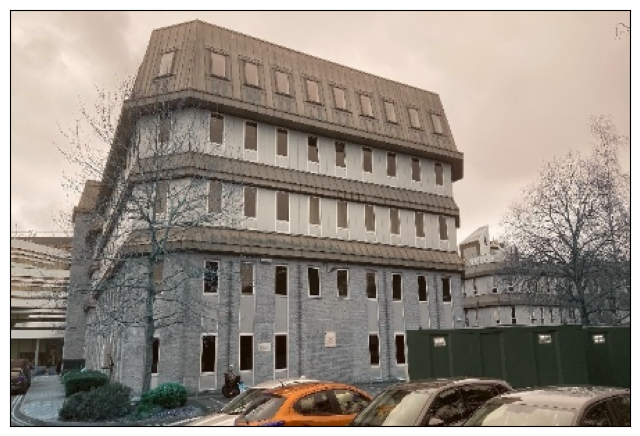

In [ ]:
index = 2
test = X_val.iloc[index]
test_path = test["new_path"]
im = cv.cvtColor(cv.imread(test_path), cv.COLOR_BGR2RGB)
show_img(im)

In [ ]:
# test Dataset
test_ds = BuildingDataset(pd.DataFrame([{'path': test_path}])['path'],
                          pd.DataFrame([{'bb':np.array([0,0,0,0])}])['bb'],
                          pd.DataFrame([{'y':[0]}])['y'])
x, y_class, y_bb = test_ds[0]
xx = torch.FloatTensor(x[None,])
# prediction
out_class, out_bb = model(xx)
# predicted class
print(f"{get_category_from_code(torch.max(out_class, 1)[1].item())} was predicted")

Weymouth was predicted


array([  6.,  35., 278., 328.], dtype=float32)

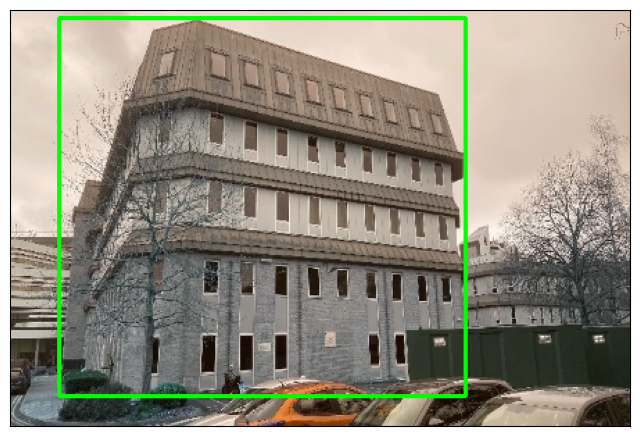

In [ ]:
ground_truth = test["new_bb"]
show_img(cv.rectangle(im.copy(), (int(ground_truth[1]), int(ground_truth[0])), (int(ground_truth[3]), int(ground_truth[2])), (0, 255, 0), 2))
ground_truth

array([ 16.57798   ,  -0.90803814, 251.14587   , 407.82816   ],
      dtype=float32)

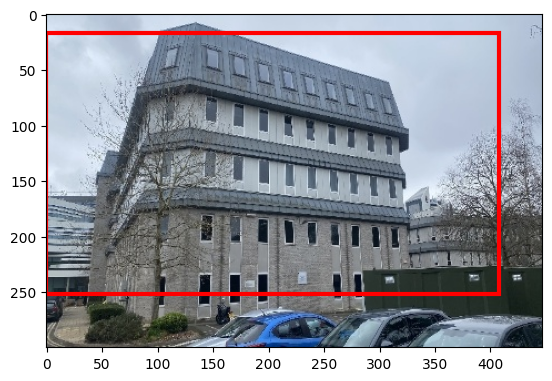

In [ ]:
# predicted bounding box
bb_hat = out_bb.detach().cpu().numpy()
# bb_hat[0][3]= bb_hat[0][3]*2
show_corner_bb(im, bb_hat[0])
bb_hat[0]

##Evaluating Our Model's Performance

We can finally analyze the error incurred by the model on a class by class basis. We can also plot these accuracy metrics on a bar graph.

Accuracy for class: The_Sir_Michael_Cobham_Library is 62.5 %
Accuracy for class: Dorset is 33.3 %
Accuracy for class: Poole_House is 57.1 %
Accuracy for class: Christchurch is 80.0 %
Accuracy for class: Kimmeridge is 88.9 %
Accuracy for class: Weymouth is 71.4 %
Accuracy for class: Fusion is 66.7 %
Accuracy for class: Poole_Gateway is 100.0 %


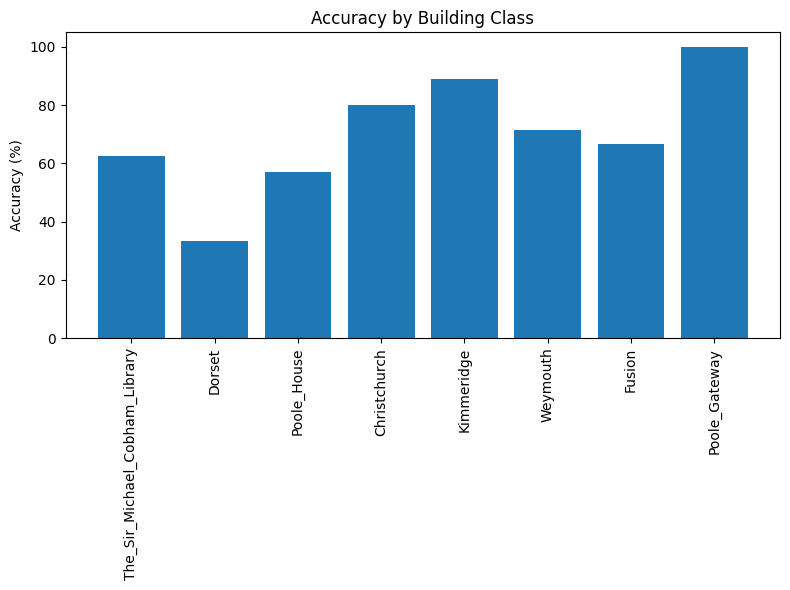

In [ ]:
def analyze_errors(model, data_loader, class_names):
    model.eval()

    correct_pred = {classname: 0 for classname in class_names}
    total_pred = {classname: 0 for classname in class_names}

    with torch.no_grad():
        for x, y_class, y_bb in data_loader:
            x = x.float()
            y_class = y_class.squeeze()

            out_class, _ = model(x)
            _, preds = torch.max(out_class, 1)

            for label, prediction in zip(y_class, preds):
                if label == prediction:
                    correct_pred[class_names[label]] += 1
                total_pred[class_names[label]] += 1

    accuracies = {}
    for classname, correct_count in correct_pred.items():
        accuracy = 100 * float(correct_count) / total_pred[classname]
        accuracies[classname] = accuracy
        print(f'Accuracy for class: {classname} is {accuracy:.1f} %')

    return accuracies

accuracies = analyze_errors(model, valid_dl, building_names)

# Plotting the accuracies
plt.figure(figsize=(8, 6))
plt.bar(range(len(accuracies)), list(accuracies.values()), align='center')
plt.xticks(range(len(accuracies)), list(accuracies.keys()), rotation='vertical')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy by Building Class')
plt.tight_layout()
plt.show()


###Plotting our Model's Training and Validation Loss

A key challenge that has affected our model's performance were the epochs that effectively saw the error rate rise consistently. This phenomenon, is a sure sign of overfitting and future work can remedy this by implementing early stopping.

As a result of the validation loss error being very large from the bounding box regression, we will have to plot the validation and training loss on two separate plots.

In our accuracy plot, you can also see that our predictions are chaotic. This is likely caused by the overfitting we have already identified.

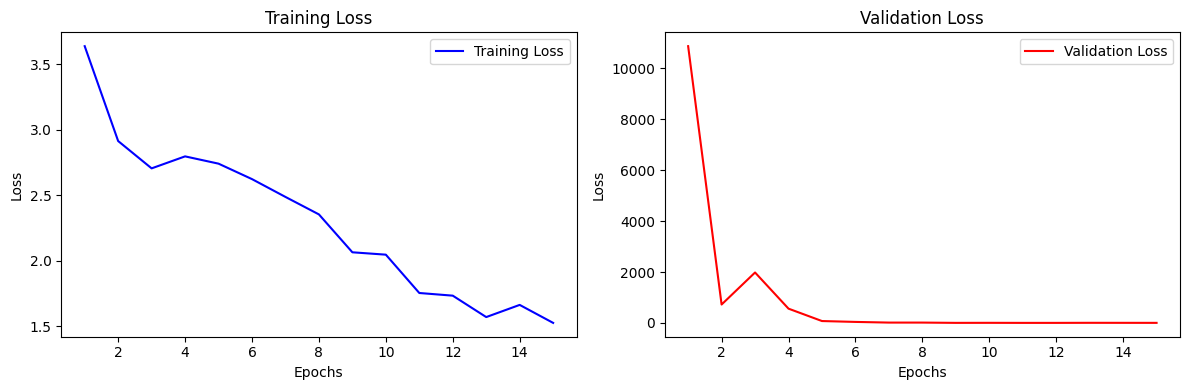

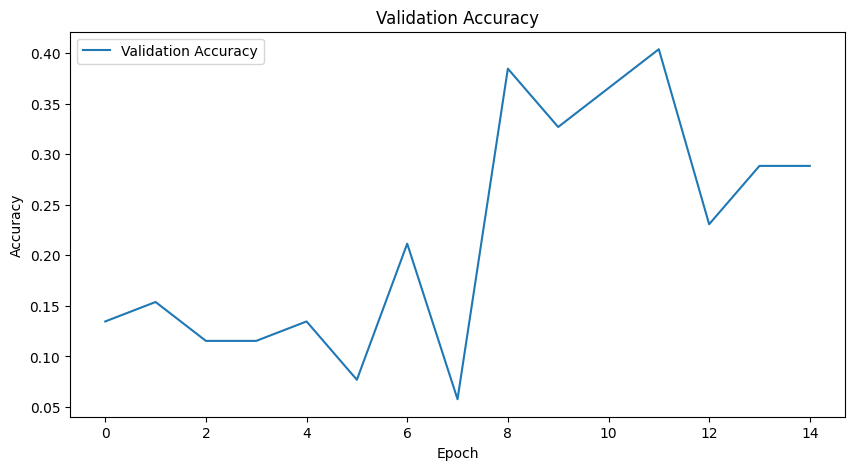

In [ ]:
# Plot the training and validation loss
epochs = range(1, len(train_losses) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(epochs, train_losses, 'b-', label='Training Loss')
ax1.set_title('Training Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(epochs, val_losses, 'r-', label='Validation Loss')
ax2.set_title('Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

plt.tight_layout()
plt.show()

# Plot the validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(val_accs, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Validation Accuracy')
plt.show()

It is observed here that the accuracy of the Resnet 18 model for buiding classification and detection is generally poor.

# **Building Detection using YOLO**

## Introduction

After testing and analayzing the viability of various model in solving our very distinct usecase. None of the models we built were robust enough to correctly detect buildings with minimal error rate. So we explored other pretrained models built to handle annotations natively.

You Only Look Once (YOLO) is designed to be fast, easy to use and more accurate for object detection tasks making it an excellent choice for our problem.

To successfully train an effective YOLO model the following was done:

- Avoided partial labeling, every instance of the objects class to be detected in every image was labelled.

- Images of the daytime sky, nighttime sky, tree and other occulusions were added a background images in the dataset to reduce the number of false positives. These background images were unlabelled and unannotated.

- Fixed class imbalance in the training, validation and test set. By redistributing the number of instances represensented per class. No instance was under or over represented. This was an error made initially as some of the classes were not present in the validation and test set.

## Model Training on Annotated Dataset

The dataset contains annotations of buildings images acquired during data acquisition.

In [ ]:
'''
Hyperparameter of Annotated Dataset in hyp.yaml

lr0: 0.01
lrf: 0.01
momentum: 0.937
weight_decay: 0.0005
warmup_epochs: 3.0
warmup_momentum: 0.8
warmup_bias_lr: 0.1
box: 0.05
cls: 0.5
cls_pw: 1.0
obj: 1.0
obj_pw: 1.0
iou_t: 0.2
anchor_t: 4.0
fl_gamma: 0.0
hsv_h: 0.015
hsv_s: 0.7
hsv_v: 0.4
degrees: 0.0
translate: 0.1
scale: 0.5
shear: 0.0
perspective: 0.0
flipud: 0.0
fliplr: 0.5
mosaic: 1.0
mixup: 0.0
copy_paste: 0.0
'''

In [ ]:
!cd yolov5 && python  /content/yolov5/train.py --img 640 --epochs 300 --data /content/yolov5/BU-Building-Dectection-4/data.yaml --weights yolov5s.pt

2024-05-09 12:29:14.575658: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-09 12:29:14.575708: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-09 12:29:14.689572: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/yolov5/BU-Building-Dectection-4/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, 

The model was able to predict most of the classes with 99.5% accuracy.
The buildings that were Fusion Building, Weymouth House and the library due to their similarities with other building and the presence of a lot of occulusions.

The metric from the results demonstrates the models capability to correctly detect buildings with a minimal error rate.

![picture](https://drive.google.com/uc?id=1jgADWIS6Bazz19fVHBnwRG2HDWv8BRqW)
<center>Model predictions from Non-Augmented Trained YOLO Model</center>
<center><small>This model struggles to predict the library at night given the building's heavy-vegetation occlusion</small></center>


## Model Training on Augumented Dataset

Our dataset of 256 Images was upscaled to 3 times the size. Augumentations like shear, rotate, crop amd brightness that likely represent real life scenerios were applied.

The goal of this training was to identify if augumentations could help improve the model's performance.

In [ ]:
'''
Hyperparameters for Augumented

lr0: 0.01
lrf: 0.01
momentum: 0.937
weight_decay: 0.0005
warmup_epochs: 3.0
warmup_momentum: 0.8
warmup_bias_lr: 0.1
box: 0.05
cls: 0.5
cls_pw: 1.0
obj: 1.0
obj_pw: 1.0
iou_t: 0.2
anchor_t: 4.0
fl_gamma: 0.0
hsv_h: 0.015
hsv_s: 0.7
hsv_v: 0.4
degrees: 0.0
translate: 0.1
scale: 0.5
shear: 0.0
perspective: 0.0
flipud: 0.0
fliplr: 0.5
mosaic: 1.0
mixup: 0.0
copy_paste: 0.0
'''

In [ ]:
!cd yolov5 && python  /content/yolov5/train.py --img 640 --epochs 300 --data /content/yolov5/BU-Building-Dectection-3/data.yaml --weights yolov5s.pt

2024-05-09 13:15:02.442707: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-09 13:15:02.442758: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-09 13:15:02.444163: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/yolov5/BU-Building-Dectection-3/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, 

The augumeted model performed excellently at night, identifying images like Sir Micheal Cobham Library with relative ease.

![picture](https://drive.google.com/uc?id=1GeaeFBtKN5UHFS_M5XZ0XQS3c8ac9ckZ)
<center>Model predictions from Augmented Trained YOLO Model</center>
<center><small>Observe how this model is able to predict the library at night with minimal issue</small></center>

## Loading Custom Models

In [ ]:
annotated_model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp/weights/best.pt', force_reload=True)

/usr/local/lib/python3.10/dist-packages/torch/hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


requirements: Ultralytics requirements ['gitpython>=3.1.30', 'pillow>=10.3.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 207.1 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0

requirements: AutoUpdate success ✅ 11.7s, installed 2 packages: ['gitpython>=3.1.30', 'pillow>=10.3.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



YOLOv5 🚀 2024-5-9 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7031701 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [ ]:
augumented_model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp2/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-5-9 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7031701 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


##  Testing Model Predictions on Unseen Data

The tests below illustrate YOLO's effective affective to treat the classification problem as a non-mutually exclusive classification problem. This is observed in it's ability to predict a the multiple classes being present in an image. This in contrast to our limited Resnet models that treated classes as indepnedent sets.

In [ ]:
test_img = cv.imread("/content/Building Classification/test/Poole Gateway Building/01.jpeg")
#test_img = cv.imread("/content/bournemouthbournemouth-universityuniversitystudentsdorsetenglandenglishgbgreatbritainbritishukunited-kingdom-2B11C63.jpg")

In [ ]:
results = annotated_model(test_img)
results.print()

image 1/1: 956x1300 1 Fusion-Building, 1 Weymouth-House
Speed: 35.9ms pre-process, 485.4ms inference, 27.2ms NMS per image at shape (1, 3, 480, 640)


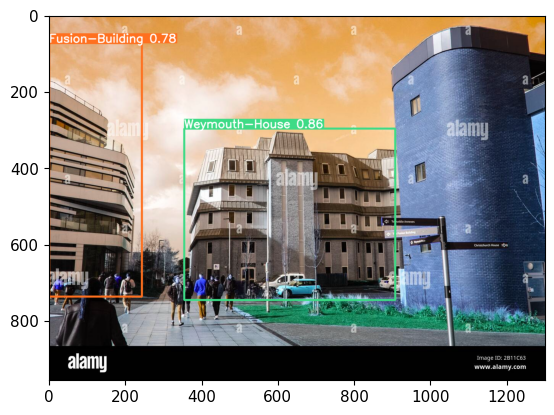

In [ ]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
results = augumented_model(test_img)
results.print()

image 1/1: 183x275 1 Dorset-House
Speed: 10.4ms pre-process, 13.4ms inference, 1.9ms NMS per image at shape (1, 3, 448, 640)


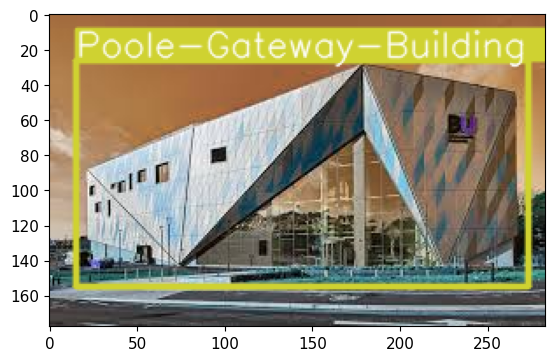

In [ ]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

## Evaluating The Performance Of Various YOLO Models

From the metrics below, the Non-Augmented YOLO Model was able to train for over 200 Epochs and achieve excellent metrics with all it's loss metrics dropping consistently.

![picture](https://drive.google.com/uc?id=15zLCa8ylMYrhrd8ptoDjE2-a_OxhRFuG)
<center> Results for the Non-Augmented YOLO Model</center>

When the loss plots for the Non-Augmented YOLO Model are compared with the YOLO Augmented Model, it soon becomes clear, that the Model trained on Augmented data, exhibits less noisy training curves across the box loss and classification loss. This reduction in loss variance continues into its precision and recall.

This demonstrates the the Model trained on Augmented Dataset is learning more of the underlying patterns smoothly, indicative of stable learning

![picture](https://drive.google.com/uc?id=1lCD4pmeakc-gsGFgzI9mH0Mrb3KlHtdI)
<center> Results for the Augmented YOLO Model</center>

Further analysis of the Non-Augmented YOLO Model also shows how this noisier training is expressed. This model's confusion matrix has a higher chance of mistaking the Fusion building and Weymouth House with the background. This model also constantly predicts the heavily-vegetation occluded Sir Michael Cobham Library as the library and as vegetation.

![picture](https://drive.google.com/uc?id=12otERgieQ-nVGc8t88BEO__wTzrhf1Zf)
<center>Confusion Matrix of The Non-Augmented YOLO Model</center>

The Confusion Matrix of the Augmented Trained YOLO model allows the model to distinguish clearly between the Library and the background. It still however has the same challenges as the Non-Augmented Model when it comes to Weymouth and Fusion Buildings.

![picture](https://drive.google.com/uc?id=1OoO6NcEZkJI4lx3fouykO5CAL5kIuQ8-)
<center>Confusion Matrix of The Augmented YOLO Model</center>

Exporting the YOLO Folder

In [ ]:
!zip -r myyolo.zip yolov5

  adding: yolov5/ (stored 0%)
  adding: yolov5/models/ (stored 0%)
  adding: yolov5/models/yolov5s.yaml (deflated 61%)
  adding: yolov5/models/__pycache__/ (stored 0%)
  adding: yolov5/models/__pycache__/common.cpython-310.pyc (deflated 55%)
  adding: yolov5/models/__pycache__/experimental.cpython-310.pyc (deflated 45%)
  adding: yolov5/models/__pycache__/__init__.cpython-310.pyc (deflated 27%)
  adding: yolov5/models/__pycache__/yolo.cpython-310.pyc (deflated 49%)
  adding: yolov5/models/tf.py (deflated 73%)
  adding: yolov5/models/yolov5n.yaml (deflated 61%)
  adding: yolov5/models/yolo.py (deflated 67%)
  adding: yolov5/models/yolov5m.yaml (deflated 61%)
  adding: yolov5/models/yolov5l.yaml (deflated 61%)
  adding: yolov5/models/yolov5x.yaml (deflated 61%)
  adding: yolov5/models/experimental.py (deflated 60%)
  adding: yolov5/models/hub/ (stored 0%)
  adding: yolov5/models/hub/yolov5-bifpn.yaml (deflated 60%)
  adding: yolov5/models/hub/yolov5m6.yaml (deflated 65%)
  adding: yolov5

# **Discussion & Future Work**

Given the performance of all Building Detection & Classification models, it has been identified that the YOLOv5 trained on the Augemented Roboflow Annotations performed the best. The YOLOv5 far superceeded our Resnet18 model and was far more robust to occlusion and brightness with minimal false positives.

It's worth noting that our Resnet 18 Building Classification model overfitted on the training data, trained for fewer epochs and could still only predict mutually exclusive classes. In future, this challenge can be addressed by using more powerful hardware (not the Google Colab free tier) paired with training more powerful networks like Resnet50. Subsequent attempts to use this model on this tier resulted in crashes.

Also, freezing the last layer improved the Baseline training and validation loss better than freezing three layers and improving the loss discrepancy immensely.

It's important to note that our limited and unrepresentative dataset may also be responsible for our Resnet 18 model overfitting. This was something that we addressed in the YOLOv5 training through added augmentation.

Future work will entail ensuring that additional images collected of the buildings are more diverse. The new images should feature close ups, more variations in scale and even more occlusions. The hope of this, is that this collective future effort would culminate in the creation of the eventual Wayfinding solution.